In [109]:
## build researcher events, student events, and self-study events
## researcher are simply those with NH citations

In [110]:
import sys

import pandas as pd
import numpy as np
import time
import datetime
import os
from nanoHUB.application import Application
from nanoHUB.configuration import ClusteringConfiguration
from nanoHUB.pipeline.geddes.data import get_default_s3_client
from nanoHUB.dataaccess.lake import S3FileMapper

from nanoHUB.clustering.infra import get_mike_only_clustered_users, get_xufeng_only_clustered_users, get_mike_xufeng_clustered_users
from nanoHUB.clustering.infra import create_clusters_repository, add_cluster_info, get_all_clustered_users, get_all_self_study_users, get_all_self_identified_users

In [111]:
pd.set_option('display.max_columns', None)
cwd = os.getcwd()

In [112]:
## determine starting year
#if cache_flag == False:
start_year_base = 1999 #2000
#start_year_base = 2019 #2000
pathsave=cwd+'/cached_data/'
pathsave=cwd+'/test_data/'
pathsave=cwd+'/SiteVisit2022_data/'



In [113]:
application = Application.get_instance()
nanohub_db = application.new_db_engine('nanohub')
nanohub_metrics_db = application.new_db_engine('nanohub_metrics')
wang159_myrmekes_db = application.new_db_engine('rfm_data')

s3_client = get_default_s3_client(application)
derived_data_file_path = 'derived_data_for_users.csv'
processed_mapper = S3FileMapper(s3_client, ClusteringConfiguration().bucket_name_processed)

## Plot Cumulative classroom/research/self-study  - from pre-processed data

In [114]:
today = datetime.datetime.today()
print(today)

2022-03-09 11:05:02.868195


In [115]:
## determine starting year
#if cache_flag == False:
start_year_base = 1999 #2000
#else:
#     print('check the saved file')
#    start_year_base = int(user_breakdown_df['year_month'].to_list()[-1][:4])
    
    

In [116]:
from copy import deepcopy

In [117]:
cache_flag = False
all_months_list = list()
for this_year in range(start_year_base+1,today.year+2):
    if cache_flag == True:
        for this_month in range(1,today.month+1):
            all_months_list.append(datetime.datetime(this_year, this_month, 1))
    else:
        for this_month in range(1,12+1):
            all_months_list.append(datetime.datetime(this_year, this_month, 1))

cache_all_month_list = pd.DataFrame()
cache_all_month_list['Date'] = all_months_list
cache_all_month_list.to_csv(cwd+'/cached_data/all_months_list.csv')
cache_all_month_list.to_csv(cwd+'/cached_data/'+ str(start_year_base)+'_all_months_list.csv')
cache_all_month_list = []
print('allmonths partial list',all_months_list[0:36])


allmonths partial list [datetime.datetime(2000, 1, 1, 0, 0), datetime.datetime(2000, 2, 1, 0, 0), datetime.datetime(2000, 3, 1, 0, 0), datetime.datetime(2000, 4, 1, 0, 0), datetime.datetime(2000, 5, 1, 0, 0), datetime.datetime(2000, 6, 1, 0, 0), datetime.datetime(2000, 7, 1, 0, 0), datetime.datetime(2000, 8, 1, 0, 0), datetime.datetime(2000, 9, 1, 0, 0), datetime.datetime(2000, 10, 1, 0, 0), datetime.datetime(2000, 11, 1, 0, 0), datetime.datetime(2000, 12, 1, 0, 0), datetime.datetime(2001, 1, 1, 0, 0), datetime.datetime(2001, 2, 1, 0, 0), datetime.datetime(2001, 3, 1, 0, 0), datetime.datetime(2001, 4, 1, 0, 0), datetime.datetime(2001, 5, 1, 0, 0), datetime.datetime(2001, 6, 1, 0, 0), datetime.datetime(2001, 7, 1, 0, 0), datetime.datetime(2001, 8, 1, 0, 0), datetime.datetime(2001, 9, 1, 0, 0), datetime.datetime(2001, 10, 1, 0, 0), datetime.datetime(2001, 11, 1, 0, 0), datetime.datetime(2001, 12, 1, 0, 0), datetime.datetime(2002, 1, 1, 0, 0), datetime.datetime(2002, 2, 1, 0, 0), datetime

In [118]:
# clustered_NH_username2;researcher_NH_username2;self_NH_username2
clustered_track = []
clustered_m_track = []
clustered_x_track = []
clustered_mx_track = []
self2_track = []

# clustered_track_per = []
# self_track_per = []
# researcher_track_per = []

In [119]:

self_identified_track_df = pd.read_csv(pathsave+'selfidentifiedauthors_track.csv',usecols=['track'])
self_identified_track = self_identified_track_df['track'].tolist()
#print('self_identified_track[0:30]',self_identified_track[0:30])
print('len(self_identified_track)',len(self_identified_track))

researcher_track_df = pd.read_csv(pathsave+'citingauthor_track.csv',usecols=['track'])
researcher_track = researcher_track_df['track'].tolist()
#print('researcher_track[0:30]',researcher_track[0:30])
print('len(researcher_track)',len(researcher_track))

self2_track_df = pd.read_csv(pathsave+'unclassified_track.csv',usecols=['track'])
self2_track = self2_track_df['track'].tolist()
#print('self2_track[0:30]',self2_track[0:30])
print('len(self2_track)',len(self2_track))

simtotal_track_df = pd.read_csv(pathsave+'simtotal_track.csv',usecols=['track'])
simtotal_track = simtotal_track_df['track'].tolist()
#print('simtotal_track[0:30]',simtotal_track[0:30])
print('len(simtotal_track)',len(simtotal_track))

clustered_track_df = pd.read_csv(pathsave+'clustered_all_track.csv',usecols=['track'])
clustered_track = clustered_track_df['track'].tolist()
#print('clustered_track[0:30]',clustered_track[0:30])
print('len(clustered_track)',len(clustered_track))

clustered_m_track_df = pd.read_csv(pathsave+'clustered_m_track.csv',usecols=['track'])
clustered_m_track = clustered_m_track_df['track'].tolist()
#print('clustered_m_track[0:30]',clustered_m_track[0:30])
print('len(clustered_m_track)',len(clustered_m_track))

clustered_x_track_df = pd.read_csv(pathsave+'clustered_x_track.csv',usecols=['track'])
clustered_x_track = clustered_x_track_df['track'].tolist()
#print('clustered_x_track[0:30]',clustered_x_track[0:30])
print('len(clustered_x_track)',len(clustered_x_track))

clustered_mx_track_df = pd.read_csv(pathsave+'clustered_mx_track.csv',usecols=['track'])
clustered_mx_track = clustered_mx_track_df['track'].tolist()
print('clustered_mx_track[0:30]',clustered_mx_track[0:30])
print('len(clustered_mx_track)',len(clustered_mx_track))


self_study_day_1_users_date_track_df = pd.read_csv(pathsave+'self_study_day_1_users_date_track.csv',usecols=['track'])
self_study_day_1_users_date_track = self_study_day_1_users_date_track_df['track'].tolist()
#print('self2_track[0:30]',self2_track[0:30])
print('len(self_study_day_1_users_date_track)',len(self_study_day_1_users_date_track))

self_study_day_2_7_users_date_track_df = pd.read_csv(pathsave+'self_study_day_2_7_users_date_track.csv',usecols=['track'])
self_study_day_2_7_users_date_track = self_study_day_2_7_users_date_track_df['track'].tolist()
#print('self2_track[0:30]',self2_track[0:30])
print('len(self_study_day_2_7_users_date_track)',len(self_study_day_2_7_users_date_track))

self_study_day_8_30_users_date_track_df = pd.read_csv(pathsave+'self_study_day_8_30_users_date_track.csv',usecols=['track'])
self_study_day_8_30_users_date_track =                          self_study_day_8_30_users_date_track_df['track'].tolist()
print('len(self_study_day_8_30_users_date_track)',          len(self_study_day_8_30_users_date_track))

self_study_day_31_90_users_date_track_df = pd.read_csv(pathsave+'self_study_day_31_90_users_date_track.csv',usecols=['track'])
self_study_day_31_90_users_date_track =                          self_study_day_31_90_users_date_track_df['track'].tolist()
print('len(self_study_day_31_90_users_date_track)',          len(self_study_day_31_90_users_date_track))

self_study_day_91_180_users_date_track_df = pd.read_csv(pathsave+'self_study_day_91_180_users_date_track.csv',usecols=['track'])
self_study_day_91_180_users_date_track =                          self_study_day_91_180_users_date_track_df['track'].tolist()
print('len(self_study_day_91_180_users_date_track)',          len(self_study_day_91_180_users_date_track))

self_study_day_181_365_users_date_track_df = pd.read_csv(pathsave+'self_study_day_181_365_users_date_track.csv',usecols=['track'])
self_study_day_181_365_users_date_track =                          self_study_day_181_365_users_date_track_df['track'].tolist()
print('len(self_study_day_181_365_users_date_track)',          len(self_study_day_181_365_users_date_track))

self_study_years_users_date_track_df = pd.read_csv(pathsave+'self_study_years_users_date_track.csv',usecols=['track'])
self_study_years_users_date_track =                          self_study_years_users_date_track_df['track'].tolist()
print('len(self_study_years_users_date_track)',          len(self_study_years_users_date_track))


clustered_all_day_1_users_date_track_df =                 pd.read_csv(pathsave+'clustered_all_day_1_users_date_track.csv',usecols=['track'])
clustered_all_day_1_users_date_track =                    clustered_all_day_1_users_date_track_df['track'].tolist()
#print('self2_track[0:30]',self2_track[0:30])
print('len(clustered_all_day_1_users_date_track)',len(clustered_all_day_1_users_date_track))

clustered_all_day_2_7_users_date_track_df = pd.read_csv(pathsave+'clustered_all_day_2_7_users_date_track.csv',usecols=['track'])
clustered_all_day_2_7_users_date_track = clustered_all_day_2_7_users_date_track_df['track'].tolist()
#print('self2_track[0:30]',self2_track[0:30])
print('len(clustered_all_day_2_7_users_date_track)',len(clustered_all_day_2_7_users_date_track))

clustered_all_day_8_30_users_date_track_df = pd.read_csv(pathsave+'clustered_all_day_8_30_users_date_track.csv',usecols=['track'])
clustered_all_day_8_30_users_date_track =                          clustered_all_day_8_30_users_date_track_df['track'].tolist()
print('len(clustered_all_day_8_30_users_date_track)',          len(clustered_all_day_8_30_users_date_track))

clustered_all_day_31_90_users_date_track_df = pd.read_csv(pathsave+'clustered_all_day_31_90_users_date_track.csv',usecols=['track'])
clustered_all_day_31_90_users_date_track =                          clustered_all_day_31_90_users_date_track_df['track'].tolist()
print('len(clustered_all_day_31_90_users_date_track)',          len(clustered_all_day_31_90_users_date_track))

clustered_all_day_91_180_users_date_track_df = pd.read_csv(pathsave+'clustered_all_day_91_180_users_date_track.csv',usecols=['track'])
clustered_all_day_91_180_users_date_track =                          clustered_all_day_91_180_users_date_track_df['track'].tolist()
print('len(clustered_all_day_91_180_users_date_track)',          len(clustered_all_day_91_180_users_date_track))

clustered_all_day_181_365_users_date_track_df = pd.read_csv(pathsave+'clustered_all_day_181_365_users_date_track.csv',usecols=['track'])
clustered_all_day_181_365_users_date_track =                          clustered_all_day_181_365_users_date_track_df['track'].tolist()
print('len(clustered_all_day_181_365_users_date_track)',          len(clustered_all_day_181_365_users_date_track))

clustered_all_years_users_date_track_df = pd.read_csv(pathsave+'clustered_all_years_users_date_track.csv',usecols=['track'])
clustered_all_years_users_date_track =                          clustered_all_years_users_date_track_df['track'].tolist()
print('len(clustered_all_years_users_date_track)',          len(clustered_all_years_users_date_track))




len(self_identified_track) 288
len(researcher_track) 288
len(self2_track) 288
len(simtotal_track) 288
len(clustered_track) 288
len(clustered_m_track) 288
len(clustered_x_track) 288
clustered_mx_track[0:30] [0, 0, 3, 4, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 5, 5, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5]
len(clustered_mx_track) 288
len(self_study_day_1_users_date_track) 288
len(self_study_day_2_7_users_date_track) 288
len(self_study_day_8_30_users_date_track) 288
len(self_study_day_31_90_users_date_track) 288
len(self_study_day_91_180_users_date_track) 288
len(self_study_day_181_365_users_date_track) 288
len(self_study_years_users_date_track) 288
len(clustered_all_day_1_users_date_track) 288
len(clustered_all_day_2_7_users_date_track) 288
len(clustered_all_day_8_30_users_date_track) 288
len(clustered_all_day_31_90_users_date_track) 288
len(clustered_all_day_91_180_users_date_track) 288
len(clustered_all_day_181_365_users_date_track) 288
len(clustered_all_years_users_date_track) 288


In [120]:
#just for testing until all data is assembled, let's trim the lists to a smaller value 
timeslot=264
if (0):
    listlength=216
    timeslot=listlength-1
    self_identified_track=self_identified_track[:listlength]
    researcher_track=researcher_track[:listlength]
    self2_track=self2_track[:listlength]
    simtotal_track=simtotal_track[:listlength]
    clustered_track=clustered_track[:listlength]
    clustered_m_track=clustered_m_track[:listlength]
    clustered_x_track=clustered_x_track[:listlength]
    clustered_mx_track=clustered_mx_track[:listlength]
    all_months_list=all_months_list[:listlength]
    self_study_day_1_users_date_track=self_study_day_1_users_date_track[:listlength]
    self_study_day_2_7_users_date_track=self_study_day_2_7_users_date_track[:listlength]
    self_study_day_8_30_users_date_track=self_study_day_8_30_users_date_track[:listlength]
    self_study_day_31_90_users_date_track=self_study_day_31_90_users_date_track[:listlength]
    self_study_day_91_180_users_date_track=self_study_day_91_180_users_date_track[:listlength]
    self_study_day_181_365_users_date_track=self_study_day_181_365_users_date_track[:listlength]
    self_study_years_users_date_track=self_study_years_users_date_track[:listlength]
    clustered_all_day_1_users_date_track=clustered_all_day_1_users_date_track[:listlength]
    clustered_all_day_2_7_users_date_track=clustered_all_day_2_7_users_date_track[:listlength]
    clustered_all_day_8_30_users_date_track=clustered_all_day_8_30_users_date_track[:listlength]
    clustered_all_day_31_90_users_date_track=clustered_all_day_31_90_users_date_track[:listlength]
    clustered_all_day_91_180_users_date_track=clustered_all_day_91_180_users_date_track[:listlength]
    clustered_all_day_181_365_users_date_track=clustered_all_day_181_365_users_date_track[:listlength]
    clustered_all_years_users_date_track=clustered_all_years_users_date_track[:listlength]
    print('simtotal_track ',simtotal_track[0:100])

In [121]:
user_breakdown_df2 = pd.DataFrame()
user_breakdown_df2['year_month'] = all_months_list
user_breakdown_df2['simtotal_track'] = simtotal_track
user_breakdown_df2['clustered_track'] = clustered_track
user_breakdown_df2['clustered_m_track'] = clustered_m_track
user_breakdown_df2['clustered_x_track'] = clustered_x_track
user_breakdown_df2['clustered_mx_track'] = clustered_mx_track
user_breakdown_df2['self_identified_track'] = self_identified_track
user_breakdown_df2['self_track'] = self2_track
user_breakdown_df2['researcher_track'] = researcher_track

user_breakdown_df2['self_study_day_1_users_date_track'] = self_study_day_1_users_date_track
user_breakdown_df2['self_study_day_2_7_users_date_track'] = self_study_day_2_7_users_date_track
user_breakdown_df2['self_study_day_8_30_users_date_track'] = self_study_day_8_30_users_date_track
user_breakdown_df2['self_study_day_31_90_users_date_track'] = self_study_day_31_90_users_date_track
user_breakdown_df2['self_study_day_91_180_users_date_track'] = self_study_day_91_180_users_date_track
user_breakdown_df2['self_study_day_181_365_users_date_track'] = self_study_day_181_365_users_date_track
user_breakdown_df2['self_study_years_users_date_track'] = self_study_years_users_date_track

user_breakdown_df2['clustered_all_day_1_users_date_track'] = clustered_all_day_1_users_date_track
user_breakdown_df2['clustered_all_day_2_7_users_date_track'] = clustered_all_day_2_7_users_date_track
user_breakdown_df2['clustered_all_day_8_30_users_date_track'] = clustered_all_day_8_30_users_date_track
user_breakdown_df2['clustered_all_day_31_90_users_date_track'] = clustered_all_day_31_90_users_date_track
user_breakdown_df2['clustered_all_day_91_180_users_date_track'] = clustered_all_day_91_180_users_date_track
user_breakdown_df2['clustered_all_day_181_365_users_date_track'] = clustered_all_day_181_365_users_date_track
user_breakdown_df2['clustered_all_years_users_date_track'] = clustered_all_years_users_date_track

#display(user_breakdown_df2.tail(5))
display(user_breakdown_df2[timeslot-10:timeslot+2])


,year_month,simtotal_track,clustered_track,clustered_m_track,clustered_x_track,clustered_mx_track,self_identified_track,self_track,researcher_track,self_study_day_1_users_date_track,self_study_day_2_7_users_date_track,self_study_day_8_30_users_date_track,self_study_day_31_90_users_date_track,self_study_day_91_180_users_date_track,self_study_day_181_365_users_date_track,self_study_years_users_date_track,clustered_all_day_1_users_date_track,clustered_all_day_2_7_users_date_track,clustered_all_day_8_30_users_date_track,clustered_all_day_31_90_users_date_track,clustered_all_day_91_180_users_date_track,clustered_all_day_181_365_users_date_track,clustered_all_years_users_date_track
254,2021-03-01,23468,13171,4145,2509,6517,225,10050,295,5133,610,700,733,538,613,1685,3706,1342,1545,2150,985,815,2625
255,2021-04-01,23758,13255,4149,2546,6560,230,10254,290,5197,631,740,780,562,635,1671,3676,1347,1558,2256,997,847,2572
256,2021-05-01,23379,12925,4072,2541,6312,236,10202,279,5176,606,739,785,561,666,1633,3556,1277,1654,2211,870,872,2481
257,2021-06-01,23072,12797,3995,2473,6329,268,10003,276,5034,583,723,792,563,674,1597,3582,1245,1703,2169,817,873,2405
258,2021-07-01,22587,12540,3963,2407,6170,322,9738,276,4868,565,704,767,561,672,1564,3489,1216,1669,2096,794,876,2397
259,2021-08-01,22616,12579,3886,2475,6218,377,9698,273,4858,560,728,776,573,671,1513,3512,1240,1721,2064,791,883,2369
260,2021-09-01,23017,12944,3847,2656,6441,414,9712,273,4813,555,739,791,634,648,1512,3533,1289,1726,2150,1009,869,2370
261,2021-10-01,23463,13359,3807,2883,6669,447,9722,269,4766,556,761,846,650,632,1491,3539,1365,1790,2406,1070,854,2337
262,2021-11-01,23017,12952,3584,2949,6419,490,9652,253,4682,563,770,871,658,614,1474,3253,1240,1742,2590,1090,823,2216
263,2021-12-01,23054,13058,3595,2856,6607,542,9559,255,4634,578,765,883,631,596,1452,3281,1195,1760,2780,1069,769,2206


In [122]:
# user_breakdown_df.to_csv(cwd+'/cached_data/temp.csv')

In [123]:
import re

In [124]:
## read the dev_flags.txt to determine where to save
with open(cwd+'/dev_flags.txt','r') as f:
    raw_flags = f.read()
flag_pattern = re.compile(r'= \w+')
flags1 = re.findall(flag_pattern,raw_flags)    
flags_result = [i[2:] for i in flags1]
dev_flag = flags_result[0]
prod_flag = flags_result[1]

[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/1218169963.py:24: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


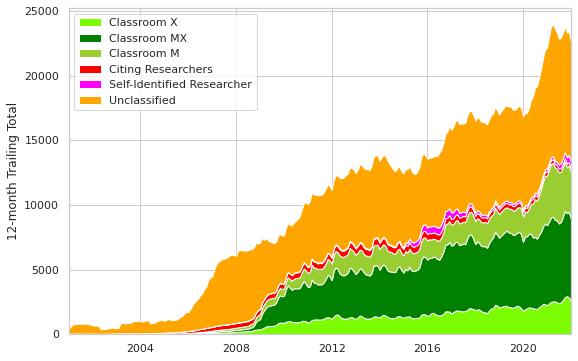

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")


end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2001,1,1)

plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
#               user_breakdown_df2[['clustered_track','self_track']].to_numpy().T, \
#              labels=['Classroom', 'Unclassified'], \
#              colors=['green', 'orange']); #Self-study              
              user_breakdown_df2[['clustered_x_track', 'clustered_mx_track', 'clustered_m_track', 'researcher_track','self_identified_track','self_track']].to_numpy().T, \
             labels=['Classroom X','Classroom MX','Classroom M','Citing Researchers', 'Self-Identified Researcher','Unclassified'], \
             colors=['lawngreen','green', 'yellowgreen','red', 'fuchsia','orange']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_GK.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_GK.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_GK.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_GK.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_GK.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_GK.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/282918211.py:19: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


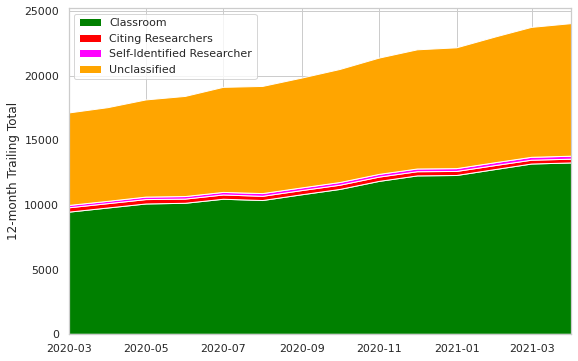

In [126]:

end_date = datetime.datetime(2021,4,1)
start_date = datetime.datetime(2020,3,1)


plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
#               user_breakdown_df2[['clustered_track','self_track']].to_numpy().T, \
#              labels=['Classroom', 'Unclassified'], \
#              colors=['green', 'orange']); #Self-study              
              user_breakdown_df2[['clustered_track', 'researcher_track','self_identified_track','self_track']].to_numpy().T, \
             labels=['Classroom','Citing Researchers', 'Self-Identified Researcher','Unclassified'], \
             colors=['green','red', 'fuchsia','orange']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_GK_1cluster.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_GK_1cluster.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_GK_1cluster.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_GK_1cluster.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_GK_1cluster.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_GK_1cluster.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
    end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2001,1,1)


In [127]:
display(user_breakdown_df2[255:265]) 

,year_month,simtotal_track,clustered_track,clustered_m_track,clustered_x_track,clustered_mx_track,self_identified_track,self_track,researcher_track,self_study_day_1_users_date_track,self_study_day_2_7_users_date_track,self_study_day_8_30_users_date_track,self_study_day_31_90_users_date_track,self_study_day_91_180_users_date_track,self_study_day_181_365_users_date_track,self_study_years_users_date_track,clustered_all_day_1_users_date_track,clustered_all_day_2_7_users_date_track,clustered_all_day_8_30_users_date_track,clustered_all_day_31_90_users_date_track,clustered_all_day_91_180_users_date_track,clustered_all_day_181_365_users_date_track,clustered_all_years_users_date_track
255,2021-04-01,23758,13255,4149,2546,6560,230,10254,290,5197,631,740,780,562,635,1671,3676,1347,1558,2256,997,847,2572
256,2021-05-01,23379,12925,4072,2541,6312,236,10202,279,5176,606,739,785,561,666,1633,3556,1277,1654,2211,870,872,2481
257,2021-06-01,23072,12797,3995,2473,6329,268,10003,276,5034,583,723,792,563,674,1597,3582,1245,1703,2169,817,873,2405
258,2021-07-01,22587,12540,3963,2407,6170,322,9738,276,4868,565,704,767,561,672,1564,3489,1216,1669,2096,794,876,2397
259,2021-08-01,22616,12579,3886,2475,6218,377,9698,273,4858,560,728,776,573,671,1513,3512,1240,1721,2064,791,883,2369
260,2021-09-01,23017,12944,3847,2656,6441,414,9712,273,4813,555,739,791,634,648,1512,3533,1289,1726,2150,1009,869,2370
261,2021-10-01,23463,13359,3807,2883,6669,447,9722,269,4766,556,761,846,650,632,1491,3539,1365,1790,2406,1070,854,2337
262,2021-11-01,23017,12952,3584,2949,6419,490,9652,253,4682,563,770,871,658,614,1474,3253,1240,1742,2590,1090,823,2216
263,2021-12-01,23054,13058,3595,2856,6607,542,9559,255,4634,578,765,883,631,596,1452,3281,1195,1760,2780,1069,769,2206
264,2022-01-01,22300,12573,3604,2578,6391,565,9273,259,4577,560,715,818,584,567,1430,3313,1191,1679,2502,984,721,2182


In [128]:
total = user_breakdown_df2['clustered_track'].to_numpy()+\
        user_breakdown_df2['self_track'].to_numpy() +\
        user_breakdown_df2['researcher_track'].to_numpy()+\
        user_breakdown_df2['self_identified_track'].to_numpy() 

#print('total ',total)

total_research = user_breakdown_df2['researcher_track'].to_numpy()+\
                 user_breakdown_df2['self_identified_track'].to_numpy() 

#print('total_research ',total_research)
user_breakdown_df2['all_researchers'] = np.add(user_breakdown_df2['self_identified_track'], user_breakdown_df2['researcher_track'])
#user_breakdown_df2['all_researchers'] = user_breakdown_df2[['researcher_track','self_identified_track']].sum
display(user_breakdown_df2['all_researchers'].tolist()[200:205])
display(user_breakdown_df2['researcher_track'].tolist()[200:205])
display(user_breakdown_df2['self_identified_track'].tolist()[200:205])

user_breakdown_df2['clustered_track_per'] = 100*np.divide(user_breakdown_df2['clustered_track'],total)
user_breakdown_df2['self_identified_track_per'] = 100*np.divide(user_breakdown_df2['self_identified_track'], total)
user_breakdown_df2['researcher_track_per'] = 100*np.divide(user_breakdown_df2['researcher_track'], total)
user_breakdown_df2['self_track_per'] = 100*np.divide(user_breakdown_df2['self_track'], total)
user_breakdown_df2['all_researchers_per'] = 100*np.divide(user_breakdown_df2['all_researchers'], total)

self_rest = user_breakdown_df2['self_track'].to_numpy() -  \
            user_breakdown_df2['self_study_day_1_users_date_track'].to_numpy() - \
            user_breakdown_df2['self_study_day_2_7_users_date_track'].to_numpy()  - \
            user_breakdown_df2['self_study_day_8_30_users_date_track'].to_numpy() - \
            user_breakdown_df2['self_study_day_31_90_users_date_track'].to_numpy() - \
            user_breakdown_df2['self_study_day_91_180_users_date_track'].to_numpy() - \
            user_breakdown_df2['self_study_day_181_365_users_date_track'].to_numpy() - \
            user_breakdown_df2['self_study_years_users_date_track'].to_numpy()


[1033, 1006, 1014, 991, 955]

[468, 449, 449, 451, 441]

[565, 557, 565, 540, 514]

In [129]:
display(user_breakdown_df2.tail())

,year_month,simtotal_track,clustered_track,clustered_m_track,clustered_x_track,clustered_mx_track,self_identified_track,self_track,researcher_track,self_study_day_1_users_date_track,self_study_day_2_7_users_date_track,self_study_day_8_30_users_date_track,self_study_day_31_90_users_date_track,self_study_day_91_180_users_date_track,self_study_day_181_365_users_date_track,self_study_years_users_date_track,clustered_all_day_1_users_date_track,clustered_all_day_2_7_users_date_track,clustered_all_day_8_30_users_date_track,clustered_all_day_31_90_users_date_track,clustered_all_day_91_180_users_date_track,clustered_all_day_181_365_users_date_track,clustered_all_years_users_date_track,all_researchers,clustered_track_per,self_identified_track_per,researcher_track_per,self_track_per,all_researchers_per
283,2023-08-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
284,2023-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
285,2023-10-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
286,2023-11-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
287,2023-12-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [130]:
display(user_breakdown_df2[264:265])

print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['simtotal_track'][timeslot] = ", user_breakdown_df2['simtotal_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_track'][timeslot] = ", user_breakdown_df2['clustered_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_track'][timeslot] = ", user_breakdown_df2['self_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['researcher_track'][timeslot] = ", user_breakdown_df2['researcher_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_identified_track'][timeslot] = ", user_breakdown_df2['self_identified_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "all researchers = ", user_breakdown_df2['researcher_track'][timeslot]+ user_breakdown_df2['self_identified_track'][timeslot])



print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_track_per'][timeslot] = ", user_breakdown_df2['clustered_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_track_per'][timeslot] = ", user_breakdown_df2['self_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['researcher_track_per'][timeslot] = ", user_breakdown_df2['researcher_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_identified_track_per'][timeslot] = ", user_breakdown_df2['self_identified_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['all_researchers_per'][timeslot] = ", user_breakdown_df2['all_researchers_per'][timeslot])

,year_month,simtotal_track,clustered_track,clustered_m_track,clustered_x_track,clustered_mx_track,self_identified_track,self_track,researcher_track,self_study_day_1_users_date_track,self_study_day_2_7_users_date_track,self_study_day_8_30_users_date_track,self_study_day_31_90_users_date_track,self_study_day_91_180_users_date_track,self_study_day_181_365_users_date_track,self_study_years_users_date_track,clustered_all_day_1_users_date_track,clustered_all_day_2_7_users_date_track,clustered_all_day_8_30_users_date_track,clustered_all_day_31_90_users_date_track,clustered_all_day_91_180_users_date_track,clustered_all_day_181_365_users_date_track,clustered_all_years_users_date_track,all_researchers,clustered_track_per,self_identified_track_per,researcher_track_per,self_track_per,all_researchers_per
264,2022-01-01,22300,12573,3604,2578,6391,565,9273,259,4577,560,715,818,584,567,1430,3313,1191,1679,2502,984,721,2182,824,55.460962,2.492281,1.142479,40.904279,3.63476


date  2022-01-01 00:00:00 user_breakdown_df2['simtotal_track'][timeslot] =  22300
date  2022-01-01 00:00:00 user_breakdown_df2['clustered_track'][timeslot] =  12573
date  2022-01-01 00:00:00 user_breakdown_df2['self_track'][timeslot] =  9273
date  2022-01-01 00:00:00 user_breakdown_df2['researcher_track'][timeslot] =  259
date  2022-01-01 00:00:00 user_breakdown_df2['self_identified_track'][timeslot] =  565
date  2022-01-01 00:00:00 all researchers =  824
date  2022-01-01 00:00:00 user_breakdown_df2['clustered_track_per'][timeslot] =  55.46096162329069
date  2022-01-01 00:00:00 user_breakdown_df2['self_track_per'][timeslot] =  40.90427878253198
date  2022-01-01 00:00:00 user_breakdown_df2['researcher_track_per'][timeslot] =  1.1424790471989414
date  2022-01-01 00:00:00 user_breakdown_df2['self_identified_track_per'][timeslot] =  2.4922805469783857
date  2022-01-01 00:00:00 user_breakdown_df2['all_researchers_per'][timeslot] =  3.6347595941773267


[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


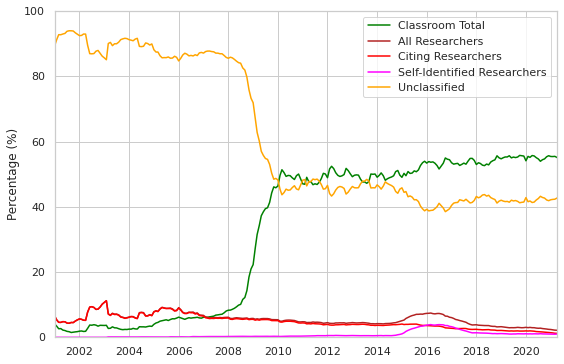

In [131]:
plt.figure(figsize=(9,6))
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_track_per, label='Classroom Total', \
             color='green');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_researchers_per, label='All Researchers', \
             color='firebrick');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.researcher_track_per, label='Citing Researchers', \
             color='red');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_identified_track_per, label='Self-Identified Researchers', \
             color='magenta');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_track_per, label='Unclassified', \
             color='orange');

plt.ylim([0, 100])
plt.legend(loc='upper right');
plt.ylabel('Percentage (%)');
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_copied.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_copied.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_copied.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_copied.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_copied.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_copied.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

In [132]:
user_breakdown_df2.to_csv(pathsave+'nh_user_breakdown.csv')

[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/3418592703.py:22: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]


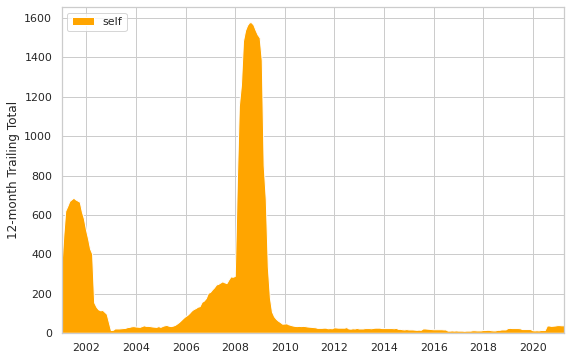

In [133]:
self_rest = user_breakdown_df2['self_track'].to_numpy() -  \
            user_breakdown_df2['self_study_day_1_users_date_track'].to_numpy() - \
            user_breakdown_df2['self_study_day_2_7_users_date_track'].to_numpy()  - \
            user_breakdown_df2['self_study_day_8_30_users_date_track'].to_numpy() - \
            user_breakdown_df2['self_study_day_31_90_users_date_track'].to_numpy() - \
            user_breakdown_df2['self_study_day_91_180_users_date_track'].to_numpy() - \
            user_breakdown_df2['self_study_day_181_365_users_date_track'].to_numpy() - \
            user_breakdown_df2['self_study_years_users_date_track'].to_numpy()
user_breakdown_df2['self_rest'] = self_rest

plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[['self_rest']].to_numpy().T, \
             labels=['self'], \
             colors=['orange']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()

In [134]:
self_2_90_days = user_breakdown_df2['self_study_day_2_7_users_date_track'].to_numpy()  + \
                user_breakdown_df2['self_study_day_8_30_users_date_track'].to_numpy() + \
                user_breakdown_df2['self_study_day_31_90_users_date_track'].to_numpy() 

self_91_365_days = user_breakdown_df2['self_study_day_91_180_users_date_track'].to_numpy() + \
            user_breakdown_df2['self_study_day_181_365_users_date_track'].to_numpy() 

clustered_all_2_90_days = user_breakdown_df2['clustered_all_day_2_7_users_date_track'].to_numpy()  + \
                user_breakdown_df2['clustered_all_day_8_30_users_date_track'].to_numpy() + \
                user_breakdown_df2['clustered_all_day_31_90_users_date_track'].to_numpy() 

clustered_all_91_365_days = user_breakdown_df2['clustered_all_day_91_180_users_date_track'].to_numpy() + \
            user_breakdown_df2['clustered_all_day_181_365_users_date_track'].to_numpy() 

user_breakdown_df2['clustered_all_2_90_days'] = clustered_all_2_90_days
user_breakdown_df2['clustered_all_91_365_days'] = clustered_all_91_365_days

user_breakdown_df2['self_2_90_days'] = self_2_90_days
user_breakdown_df2['self_91_365_days'] = self_91_365_days

self_over1_days = user_breakdown_df2['self_2_90_days'].to_numpy()  + \
                user_breakdown_df2['self_91_365_days'].to_numpy() + \
                user_breakdown_df2['self_study_years_users_date_track'].to_numpy() 


user_breakdown_df2['self_over1_days'] = self_over1_days

clustered_all_over1_days = user_breakdown_df2['clustered_all_2_90_days'].to_numpy()  + \
                user_breakdown_df2['clustered_all_91_365_days'].to_numpy() + \
                user_breakdown_df2['clustered_all_years_users_date_track'].to_numpy() 


user_breakdown_df2['clustered_all_over1_days'] = clustered_all_over1_days


all_2_90_days = user_breakdown_df2['self_2_90_days'].to_numpy()  + \
                user_breakdown_df2['clustered_all_2_90_days'].to_numpy() 


all_91_365_days = user_breakdown_df2['self_91_365_days'].to_numpy() + \
            user_breakdown_df2['clustered_all_91_365_days'].to_numpy() 

all_years = user_breakdown_df2['self_study_years_users_date_track'].to_numpy() + \
            user_breakdown_df2['clustered_all_years_users_date_track'].to_numpy() 

all_1_days = user_breakdown_df2['self_study_day_1_users_date_track'].to_numpy() + \
            user_breakdown_df2['clustered_all_day_1_users_date_track'].to_numpy() 

user_breakdown_df2['all_2_90_days'] = all_2_90_days
user_breakdown_df2['all_91_365_days'] = all_91_365_days
user_breakdown_df2['all_years'] = all_years
user_breakdown_df2['all_1_days'] = all_1_days


In [135]:
user_breakdown_df2['self_study_day_1_users_date_track_per'] = 100*np.divide(user_breakdown_df2['self_study_day_1_users_date_track'], total)
user_breakdown_df2['self_study_day_2_7_users_date_track_per'] = 100*np.divide(user_breakdown_df2['self_study_day_2_7_users_date_track'], total)
user_breakdown_df2['self_study_day_8_30_users_date_track_per'] = 100*np.divide(user_breakdown_df2['self_study_day_8_30_users_date_track'], total)
user_breakdown_df2['self_study_day_31_90_users_date_track_per'] = 100*np.divide(user_breakdown_df2['self_study_day_31_90_users_date_track'], total)
user_breakdown_df2['self_study_day_91_180_users_date_track_per'] = 100*np.divide(user_breakdown_df2['self_study_day_91_180_users_date_track'], total)
user_breakdown_df2['self_study_day_181_365_users_date_track_per'] = 100*np.divide(user_breakdown_df2['self_study_day_181_365_users_date_track'], total)
user_breakdown_df2['self_study_years_users_date_track_per'] = 100*np.divide(user_breakdown_df2['self_study_years_users_date_track'], total)
user_breakdown_df2['self_2_90_days_per'] = 100*np.divide(user_breakdown_df2['self_2_90_days'], total)
user_breakdown_df2['self_91_365_days_per'] = 100*np.divide(user_breakdown_df2['self_91_365_days'], total)
user_breakdown_df2['self_over1_days_per'] = 100*np.divide(user_breakdown_df2['self_over1_days'], total)

In [136]:
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_day_1_users_date_track_per'][timeslot] = ", user_breakdown_df2['self_study_day_1_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_day_2_7_users_date_track_per'][timeslot] = ", user_breakdown_df2['self_study_day_2_7_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_day_8_30_users_date_track_per'][timeslot] = ", user_breakdown_df2['self_study_day_8_30_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_day_31_90_users_date_track_per'][timeslot] = ", user_breakdown_df2['self_study_day_31_90_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_day_91_180_users_date_track_per'][timeslot] = ", user_breakdown_df2['self_study_day_91_180_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_day_181_365_users_date_track_per'][timeslot] = ", user_breakdown_df2['self_study_day_181_365_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_years_users_date_track_per'][timeslot] = ", user_breakdown_df2['self_study_years_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_2_90_days_per'][timeslot] = ", user_breakdown_df2['self_2_90_days_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_91_365_days_per'][timeslot] = ", user_breakdown_df2['self_91_365_days_per'][timeslot])

print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_over1_days_per'][timeslot] = ", user_breakdown_df2['self_over1_days_per'][timeslot])



date  2022-01-01 00:00:00 user_breakdown_df2['self_study_day_1_users_date_track_per'][timeslot] =  20.1896779885311
date  2022-01-01 00:00:00 user_breakdown_df2['self_study_day_2_7_users_date_track_per'][timeslot] =  2.47022496691663
date  2022-01-01 00:00:00 user_breakdown_df2['self_study_day_8_30_users_date_track_per'][timeslot] =  3.1539479488310542
date  2022-01-01 00:00:00 user_breakdown_df2['self_study_day_31_90_users_date_track_per'][timeslot] =  3.60829289810322
date  2022-01-01 00:00:00 user_breakdown_df2['self_study_day_91_180_users_date_track_per'][timeslot] =  2.576091751213057
date  2022-01-01 00:00:00 user_breakdown_df2['self_study_day_181_365_users_date_track_per'][timeslot] =  2.5011027790030878
date  2022-01-01 00:00:00 user_breakdown_df2['self_study_years_users_date_track_per'][timeslot] =  6.3078958976621085
date  2022-01-01 00:00:00 user_breakdown_df2['self_2_90_days_per'][timeslot] =  9.232465813850904
date  2022-01-01 00:00:00 user_breakdown_df2['self_91_365_days_

In [137]:
clustered_all_rest = user_breakdown_df2['clustered_track'].to_numpy() -  \
            user_breakdown_df2['clustered_all_day_1_users_date_track'].to_numpy() - \
            user_breakdown_df2['clustered_all_day_2_7_users_date_track'].to_numpy()  - \
            user_breakdown_df2['clustered_all_day_8_30_users_date_track'].to_numpy() - \
            user_breakdown_df2['clustered_all_day_31_90_users_date_track'].to_numpy() - \
            user_breakdown_df2['clustered_all_day_91_180_users_date_track'].to_numpy() - \
            user_breakdown_df2['clustered_all_day_181_365_users_date_track'].to_numpy() - \
            user_breakdown_df2['clustered_all_years_users_date_track'].to_numpy()
user_breakdown_df2['clustered_all_rest'] = clustered_all_rest

In [138]:
user_breakdown_df2['clustered_all_day_1_users_date_track_per'] = 100*np.divide(user_breakdown_df2['clustered_all_day_1_users_date_track'],total)
user_breakdown_df2['clustered_all_years_users_date_track_per'] = 100*np.divide(user_breakdown_df2['clustered_all_years_users_date_track'], total)
user_breakdown_df2['self_2_90_days_per'] = 100*np.divide(user_breakdown_df2['self_2_90_days'], total)
user_breakdown_df2['self_91_365_days_per'] = 100*np.divide(user_breakdown_df2['self_91_365_days'], total)
user_breakdown_df2['clustered_all_day_2_7_users_date_track_per'] = 100*np.divide(user_breakdown_df2['clustered_all_day_2_7_users_date_track'], total)
user_breakdown_df2['clustered_all_day_8_30_users_date_track_per'] = 100*np.divide(user_breakdown_df2['clustered_all_day_8_30_users_date_track'], total)
user_breakdown_df2['clustered_all_day_31_90_users_date_track_per'] = 100*np.divide(user_breakdown_df2['clustered_all_day_31_90_users_date_track'], total)
user_breakdown_df2['clustered_all_day_91_180_users_date_track_per'] = 100*np.divide(user_breakdown_df2['clustered_all_day_91_180_users_date_track'], total)
user_breakdown_df2['clustered_all_day_181_365_users_date_track_per'] = 100*np.divide(user_breakdown_df2['clustered_all_day_181_365_users_date_track'], total)



In [139]:
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_day_1_users_date_track_per'][timeslot] = ", user_breakdown_df2['clustered_all_day_1_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_years_users_date_track_per'][timeslot] = ", user_breakdown_df2['clustered_all_years_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_2_90_days_per'][timeslot] = ", user_breakdown_df2['self_2_90_days_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_91_365_days_per'][timeslot] = ", user_breakdown_df2['self_91_365_days_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_day_2_7_users_date_track_per'][timeslot] = ", user_breakdown_df2['clustered_all_day_2_7_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_day_8_30_users_date_track_per'][timeslot] = ", user_breakdown_df2['clustered_all_day_8_30_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_day_31_90_users_date_track_per'][timeslot] = ", user_breakdown_df2['clustered_all_day_31_90_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_day_91_180_users_date_track_per'][timeslot] = ", user_breakdown_df2['clustered_all_day_91_180_users_date_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_day_181_365_users_date_track_per'][timeslot] = ", user_breakdown_df2['clustered_all_day_181_365_users_date_track_per'][timeslot])



date  2022-01-01 00:00:00 user_breakdown_df2['clustered_all_day_1_users_date_track_per'][timeslot] =  14.614027348919276
date  2022-01-01 00:00:00 user_breakdown_df2['clustered_all_years_users_date_track_per'][timeslot] =  9.625055138950154
date  2022-01-01 00:00:00 user_breakdown_df2['self_2_90_days_per'][timeslot] =  9.232465813850904
date  2022-01-01 00:00:00 user_breakdown_df2['self_91_365_days_per'][timeslot] =  5.077194530216145
date  2022-01-01 00:00:00 user_breakdown_df2['clustered_all_day_2_7_users_date_track_per'][timeslot] =  5.25363917071019
date  2022-01-01 00:00:00 user_breakdown_df2['clustered_all_day_8_30_users_date_track_per'][timeslot] =  7.406263784737539
date  2022-01-01 00:00:00 user_breakdown_df2['clustered_all_day_31_90_users_date_track_per'][timeslot] =  11.036612262902516
date  2022-01-01 00:00:00 user_breakdown_df2['clustered_all_day_91_180_users_date_track_per'][timeslot] =  4.340538156153507
date  2022-01-01 00:00:00 user_breakdown_df2['clustered_all_day_181

[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/2929677609.py:35: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


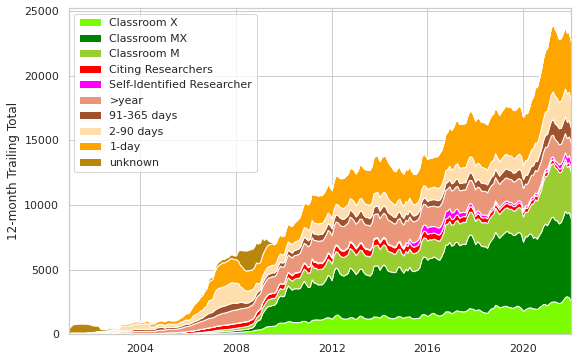

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")

end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2001,1,1)

# plt.figure(figsize=(9,6))
# # user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
# #user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
# plt.stackplot(user_breakdown_df2.year_month, \
#               user_breakdown_df2[['clustered_x_track', 'clustered_mx_track', 'clustered_m_track', 'researcher_track','self_identified_track','self_study_day_1_users_date_track','self_study_day_2_7_users_date_track','self_study_day_8_30_users_date_track','self_study_day_31_90_users_date_track','self_study_day_91_180_users_date_track','self_study_day_181_365_users_date_track','self_study_years_users_date_track','self_rest']].to_numpy().T, \
#              labels=['Classroom X','Classroom MX','Classroom M','Citing Researchers', 'Self-Identified Researcher','1-day','1-week','1-month','3-month','half-year','year','>year','unknown'], \
#              colors=['lawngreen','green', 'yellowgreen','red', 'fuchsia','orange','navajowhite','darkorange','peachpuff','peru','burlywood','tan','darkgoldenrod']); #Self-study

# plt.legend(loc='upper left')#,fontsize=14);
# plt.ylabel('12-month Trailing Total')#,fontsize=15)
# plt.xlim([start_date, end_date])#,fontsize=15)
# plt.locator_params(axis="x", nbins=40)
# #plt.xticks( rotation=45, ha='right')
# # plt.show()

plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[['clustered_x_track', 'clustered_mx_track', 'clustered_m_track', 'researcher_track','self_identified_track','self_study_years_users_date_track','self_91_365_days','self_2_90_days','self_study_day_1_users_date_track','self_rest']].to_numpy().T, \
             labels=['Classroom X','Classroom MX','Classroom M','Citing Researchers', 'Self-Identified Researcher','>year','91-365 days','2-90 days','1-day','unknown'], \
             colors=['lawngreen','green', 'yellowgreen','red', 'fuchsia','darksalmon','sienna','navajowhite','orange','darkgoldenrod']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_lifetimesmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_lifetimesmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_lifetimesmall.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_lifetimesmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_lifetimesmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_lifetimesmall.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
    

[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/3086289818.py:30: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


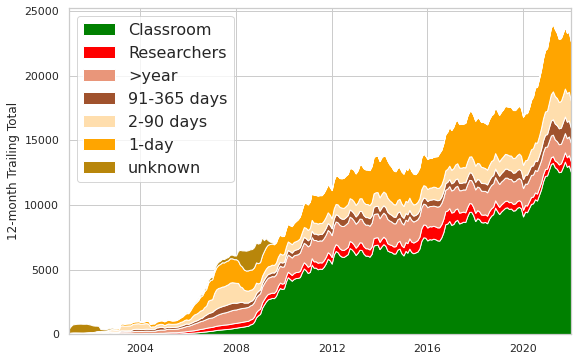

In [141]:

end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2001,1,1)

# plt.figure(figsize=(9,6))
# # user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
# #user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
# plt.stackplot(user_breakdown_df2.year_month, \
#               user_breakdown_df2[['clustered_x_track', 'clustered_mx_track', 'clustered_m_track', 'researcher_track','self_identified_track','self_study_day_1_users_date_track','self_study_day_2_7_users_date_track','self_study_day_8_30_users_date_track','self_study_day_31_90_users_date_track','self_study_day_91_180_users_date_track','self_study_day_181_365_users_date_track','self_study_years_users_date_track','self_rest']].to_numpy().T, \
#              labels=['Classroom X','Classroom MX','Classroom M','Citing Researchers', 'Self-Identified Researcher','1-day','1-week','1-month','3-month','half-year','year','>year','unknown'], \
#              colors=['lawngreen','green', 'yellowgreen','red', 'fuchsia','orange','navajowhite','darkorange','peachpuff','peru','burlywood','tan','darkgoldenrod']); #Self-study

# plt.legend(loc='upper left')#,fontsize=14);
# plt.ylabel('12-month Trailing Total')#,fontsize=15)
# plt.xlim([start_date, end_date])#,fontsize=15)
# plt.locator_params(axis="x", nbins=40)
# #plt.xticks( rotation=45, ha='right')
# # plt.show()

plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[['clustered_track', 'all_researchers','self_study_years_users_date_track','self_91_365_days','self_2_90_days','self_study_day_1_users_date_track','self_rest']].to_numpy().T, \
             labels=['Classroom','Researchers', '>year','91-365 days','2-90 days','1-day','unknown'], \
             colors=['green', 'red', 'darksalmon','sienna','navajowhite','orange','darkgoldenrod']); #Self-study

plt.legend(loc='upper left',fontsize=16);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_1class_lifetimesmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_1class_lifetimesmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_1class_lifetimesmall.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_1class_lifetimesmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_1class_lifetimesmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_1class_lifetimesmall.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/4024254797.py:30: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


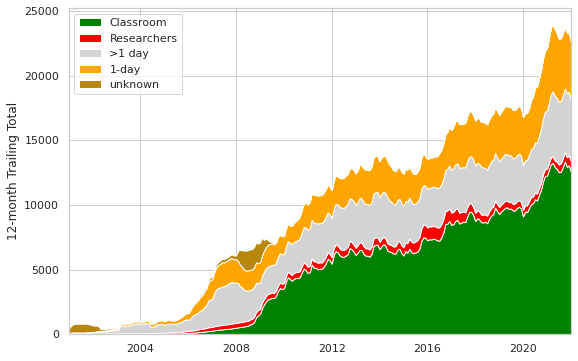

In [142]:

end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2001,1,1)

# plt.figure(figsize=(9,6))
# # user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
# #user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
# plt.stackplot(user_breakdown_df2.year_month, \
#               user_breakdown_df2[['clustered_x_track', 'clustered_mx_track', 'clustered_m_track', 'researcher_track','self_identified_track','self_study_day_1_users_date_track','self_study_day_2_7_users_date_track','self_study_day_8_30_users_date_track','self_study_day_31_90_users_date_track','self_study_day_91_180_users_date_track','self_study_day_181_365_users_date_track','self_study_years_users_date_track','self_rest']].to_numpy().T, \
#              labels=['Classroom X','Classroom MX','Classroom M','Citing Researchers', 'Self-Identified Researcher','1-day','1-week','1-month','3-month','half-year','year','>year','unknown'], \
#              colors=['lawngreen','green', 'yellowgreen','red', 'fuchsia','orange','navajowhite','darkorange','peachpuff','peru','burlywood','tan','darkgoldenrod']); #Self-study

# plt.legend(loc='upper left')#,fontsize=14);
# plt.ylabel('12-month Trailing Total')#,fontsize=15)
# plt.xlim([start_date, end_date])#,fontsize=15)
# plt.locator_params(axis="x", nbins=40)
# #plt.xticks( rotation=45, ha='right')
# # plt.show()

plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[['clustered_track', 'all_researchers','self_over1_days','self_study_day_1_users_date_track','self_rest']].to_numpy().T, \
             labels=['Classroom','Researchers','>1 day','1-day','unknown'], \
             colors=['green', 'red', 'lightgray','orange','darkgoldenrod']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_1class_lifetimes1day.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_1class_lifetimes1day.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_1class_lifetimes1day.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_1class_lifetimes1day.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_1class_lifetimes1day.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_1class_lifetimes1day.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/850228451.py:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


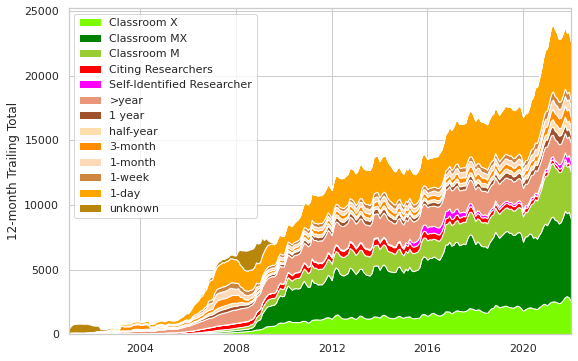

In [143]:
plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[['clustered_x_track', 'clustered_mx_track', 'clustered_m_track', 'researcher_track','self_identified_track','self_study_years_users_date_track','self_study_day_181_365_users_date_track','self_study_day_91_180_users_date_track','self_study_day_31_90_users_date_track','self_study_day_8_30_users_date_track','self_study_day_2_7_users_date_track','self_study_day_1_users_date_track','self_rest']].to_numpy().T, \
             labels=['Classroom X','Classroom MX','Classroom M','Citing Researchers', 'Self-Identified Researcher','>year','1 year','half-year','3-month','1-month','1-week','1-day','unknown'], \
             colors=['lawngreen','green', 'yellowgreen','red', 'fuchsia','darksalmon','sienna','navajowhite','darkorange','peachpuff','peru','orange','darkgoldenrod']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_lifetime.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_lifetime.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_lifetime.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_lifetime.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_lifetime.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_lifetime.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
    

[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/3687529855.py:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


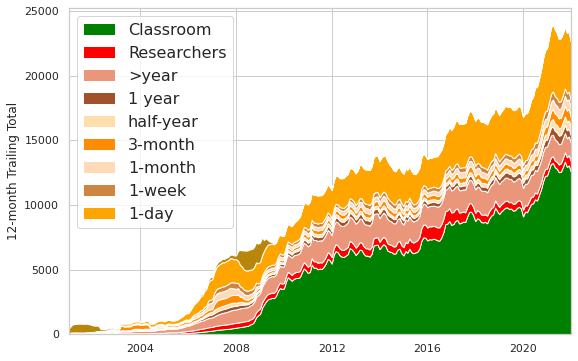

In [144]:
plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[['clustered_track', 'all_researchers','self_study_years_users_date_track','self_study_day_181_365_users_date_track','self_study_day_91_180_users_date_track','self_study_day_31_90_users_date_track','self_study_day_8_30_users_date_track','self_study_day_2_7_users_date_track','self_study_day_1_users_date_track','self_rest']].to_numpy().T, \
             labels=['Classroom','Researchers', '>year','1 year','half-year','3-month','1-month','1-week','1-day'], \
             colors=['green', 'red', 'darksalmon','sienna','navajowhite','darkorange','peachpuff','peru','orange','darkgoldenrod']); #Self-study

plt.legend(loc='upper left',fontsize=16);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_lifetime1class.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_lifetime1class.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_lifetime1class.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_lifetime1class.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_lifetime1class.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_lifetime1class.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

darksalmon
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/3917600738.py:23: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/3917600738.py:51: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


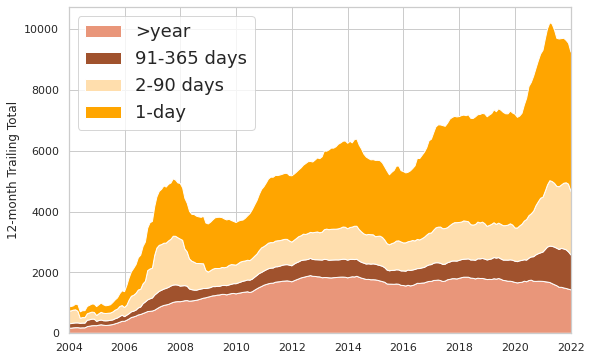

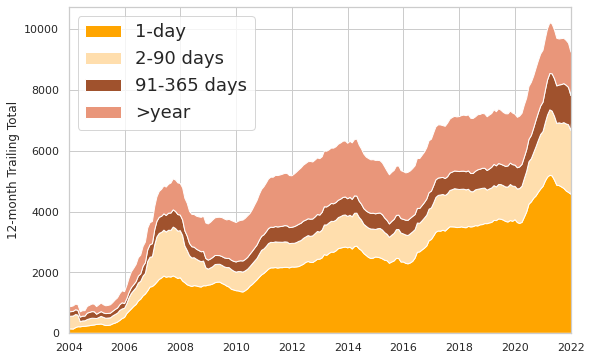

In [145]:

end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2004,1,1)

gpal = ['darksalmon','sienna','navajowhite','orange','darkgoldenrod']
print(gpal[0])
cdata = ['self_study_years_users_date_track','self_91_365_days','self_2_90_days','self_study_day_1_users_date_track','self_rest']

clab = ['>year','91-365 days','2-90 days','1-day','unknown']



plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[[cdata[0],cdata[1],cdata[2],cdata[3]]].to_numpy().T, \
             labels=[clab[0],clab[1],clab[2],clab[3]], \
             colors=[gpal[0],gpal[1],gpal[2],gpal[3]]); #Self-study

plt.legend(loc='upper left',fontsize=18);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimesmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimesmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimesmall.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimesmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimesmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimesmall.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
    
    
plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[[cdata[3],cdata[2],cdata[1],cdata[0]]].to_numpy().T, \
                           labels=[clab[3],clab[2],clab[1],clab[0]], \
                           colors=[gpal[3],gpal[2],gpal[1],gpal[0]]); #Self-study

plt.legend(loc='upper left',fontsize=18);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimesmallrev.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimesmallrev.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimesmallrev.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimesmallrev.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimesmallrev.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimesmallrev.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

darksalmon
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/2133451936.py:18: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


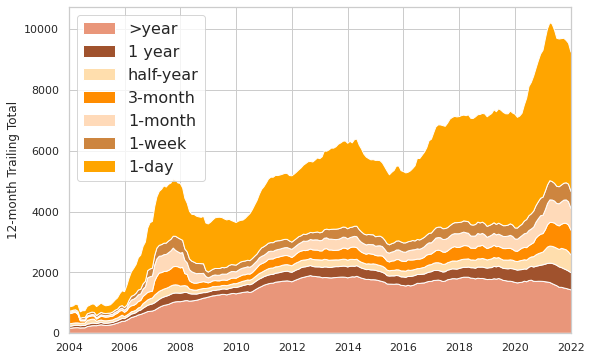

In [146]:
gpal = ['darksalmon','sienna','navajowhite','darkorange','peachpuff','peru','orange','darkgoldenrod']
print(gpal[0])
cdata = ['self_study_years_users_date_track','self_study_day_181_365_users_date_track','self_study_day_91_180_users_date_track','self_study_day_31_90_users_date_track','self_study_day_8_30_users_date_track','self_study_day_2_7_users_date_track','self_study_day_1_users_date_track','self_rest']

clab = ['>year','1 year','half-year','3-month','1-month','1-week','1-day','unknown']

plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[[cdata[0],cdata[1],cdata[2],cdata[3],cdata[4],cdata[5],cdata[6]]].to_numpy().T, \
             labels=[clab[0],clab[1],clab[2],clab[3],clab[4],clab[5],clab[6]], \
             colors=[gpal[0],gpal[1],gpal[2],gpal[3],gpal[4],gpal[5],gpal[6]]); #Self-study

plt.legend(loc='upper left',fontsize=16);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetime.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetime.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetime.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetime.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetime.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetime.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

darksalmon
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/2713460625.py:18: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


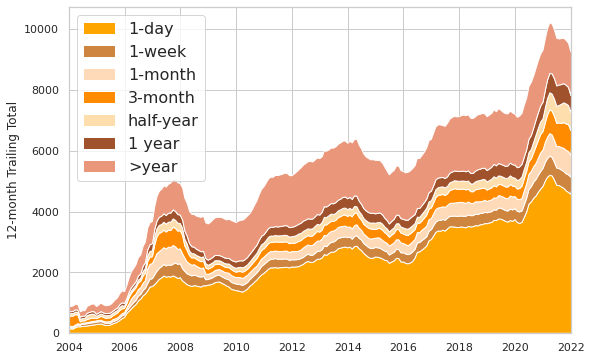

In [147]:
gpal = ['darksalmon','sienna','navajowhite','darkorange','peachpuff','peru','orange','darkgoldenrod']
print(gpal[0])
cdata = ['self_study_years_users_date_track','self_study_day_181_365_users_date_track','self_study_day_91_180_users_date_track','self_study_day_31_90_users_date_track','self_study_day_8_30_users_date_track','self_study_day_2_7_users_date_track','self_study_day_1_users_date_track','self_rest']

clab = ['>year','1 year','half-year','3-month','1-month','1-week','1-day','unknown']

plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[[cdata[6],cdata[5],cdata[4],cdata[3],cdata[2],cdata[1],cdata[0]]].to_numpy().T, \
                           labels=[clab[6],clab[5],clab[4],clab[3],clab[2],clab[1],clab[0]], \
                           colors=[gpal[6],gpal[5],gpal[4],gpal[3],gpal[2],gpal[1],gpal[0]]); #Self-study

plt.legend(loc='upper left',fontsize=16);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimerev.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimerev.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimerev.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimerev.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimerev.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimerev.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

darksalmon
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/3384598107.py:22: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


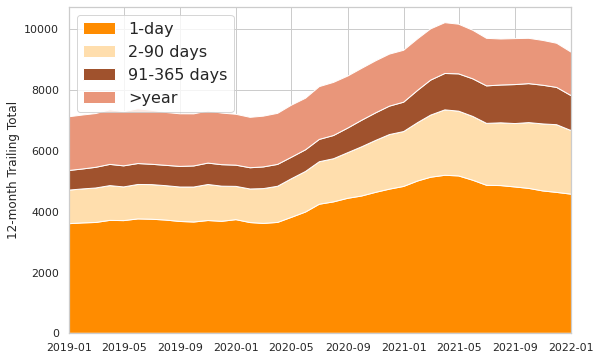

In [148]:
gpal = ['darksalmon','sienna','navajowhite','darkorange','peachpuff','peru','orange','darkgoldenrod']
print(gpal[0])
cdat = ['self_study_years_users_date_track','self_91_365_days','self_2_90_days','self_study_day_1_users_date_track','self_rest']

clab = ['>year','91-365 days','2-90 days','1-day','unknown']

end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2019,1,1)


plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[[cdat[3],cdat[2],cdat[1],cdat[0]]].to_numpy().T, \
                           labels=[clab[3],clab[2],clab[1],clab[0]], \
                           colors=[gpal[3],gpal[2],gpal[1],gpal[0]]); #Self-study

plt.legend(loc='upper left',fontsize=16);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimerevsmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimerevsmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_12months_lifetimerevsmall.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimerevsmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimerevsmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_12months_lifetimerevsmall.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
    
    
end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2001,1,1)

green
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/2123218532.py:22: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/2123218532.py:53: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


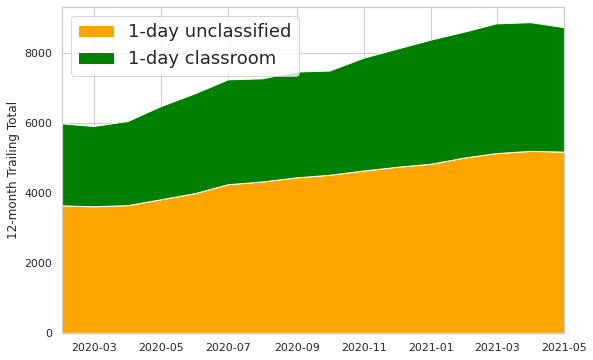

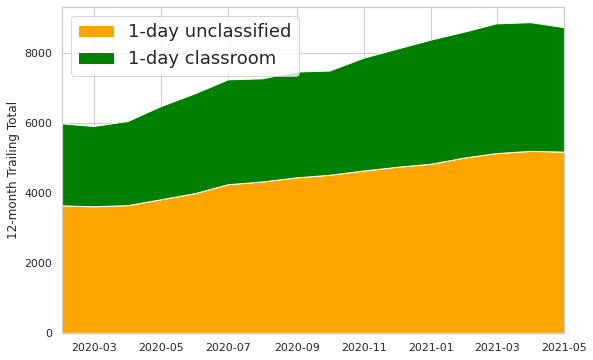

In [149]:
gpal = ['green','orange']
print(gpal[0])
cdat = ['clustered_all_day_1_users_date_track','self_study_day_1_users_date_track']

clab = ['1-day classroom','1-day unclassified']

end_date = datetime.datetime(2021,5,1)
start_date = datetime.datetime(2020,2,1)


plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[[cdat[1],cdat[0]]].to_numpy().T, \
                           labels=[clab[1],clab[0]], \
                           colors=[gpal[1],gpal[0]]); #Self-study

plt.legend(loc='upper left',fontsize=18);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_1day_12months_lifetimerevsmallCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_1day_12months_lifetimerevsmallCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_1day_12months_lifetimerevsmallCOVID.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_1day_12months_lifetimerevsmallCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_1day_12months_lifetimerevsmallCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_1day_12months_lifetimerevsmallCOVID.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
    
end_date = datetime.datetime(2021,5,1)
start_date = datetime.datetime(2020,2,1)


plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[[cdat[1],cdat[0]]].to_numpy().T, \
                           labels=[clab[1],clab[0]], \
                           colors=[gpal[1],gpal[0]]); #Self-study

plt.legend(loc='upper left',fontsize=18);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_1day_12months_lifetime.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_1day_12months_lifetime.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_1day_12months_lifetime.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_1day_12months_lifetime.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_1day_12months_lifetime.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_1day_12months_lifetime.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
    
 

end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2001,1,1)


In [150]:
timeslotsave=timeslot
timeslot = 260-19
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot] = ", user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_day_1_users_date_track'][timeslot] = ", user_breakdown_df2['self_study_day_1_users_date_track'][timeslot])
timeslot = 260-18
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot] = ", user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_day_1_users_date_track'][timeslot] = ", user_breakdown_df2['self_study_day_1_users_date_track'][timeslot])
timeslot = 260-17
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot] = ", user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_day_1_users_date_track'][timeslot] = ", user_breakdown_df2['self_study_day_1_users_date_track'][timeslot])
timeslot = 260-18+12+1
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot] = ", user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_day_1_users_date_track'][timeslot] = ", user_breakdown_df2['self_study_day_1_users_date_track'][timeslot])
timeslot = 260-18+12+2
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot] = ", user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_study_day_1_users_date_track'][timeslot] = ", user_breakdown_df2['self_study_day_1_users_date_track'][timeslot])


date  2020-02-01 00:00:00 user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot] =  2342
date  2020-02-01 00:00:00 user_breakdown_df2['self_study_day_1_users_date_track'][timeslot] =  3642
date  2020-03-01 00:00:00 user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot] =  2293
date  2020-03-01 00:00:00 user_breakdown_df2['self_study_day_1_users_date_track'][timeslot] =  3614
date  2020-04-01 00:00:00 user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot] =  2402
date  2020-04-01 00:00:00 user_breakdown_df2['self_study_day_1_users_date_track'][timeslot] =  3647
date  2021-04-01 00:00:00 user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot] =  3676
date  2021-04-01 00:00:00 user_breakdown_df2['self_study_day_1_users_date_track'][timeslot] =  5197
date  2021-05-01 00:00:00 user_breakdown_df2['clustered_all_day_1_users_date_track'][timeslot] =  3556
date  2021-05-01 00:00:00 user_breakdown_df2['self_study_day_1_users_date_track'][tim

In [151]:
display(user_breakdown_df2)


,year_month,simtotal_track,clustered_track,clustered_m_track,clustered_x_track,clustered_mx_track,self_identified_track,self_track,researcher_track,self_study_day_1_users_date_track,self_study_day_2_7_users_date_track,self_study_day_8_30_users_date_track,self_study_day_31_90_users_date_track,self_study_day_91_180_users_date_track,self_study_day_181_365_users_date_track,self_study_years_users_date_track,clustered_all_day_1_users_date_track,clustered_all_day_2_7_users_date_track,clustered_all_day_8_30_users_date_track,clustered_all_day_31_90_users_date_track,clustered_all_day_91_180_users_date_track,clustered_all_day_181_365_users_date_track,clustered_all_years_users_date_track,all_researchers,clustered_track_per,self_identified_track_per,researcher_track_per,self_track_per,all_researchers_per,self_rest,clustered_all_2_90_days,clustered_all_91_365_days,self_2_90_days,self_91_365_days,self_over1_days,clustered_all_over1_days,all_2_90_days,all_91_365_days,all_years,all_1_days,self_study_day_1_users_date_track_per,self_study_day_2_7_users_date_track_per,self_study_day_8_30_users_date_track_per,self_study_day_31_90_users_date_track_per,self_study_day_91_180_users_date_track_per,self_study_day_181_365_users_date_track_per,self_study_years_users_date_track_per,self_2_90_days_per,self_91_365_days_per,self_over1_days_per,clustered_all_rest,clustered_all_day_1_users_date_track_per,clustered_all_years_users_date_track_per,clustered_all_day_2_7_users_date_track_per,clustered_all_day_8_30_users_date_track_per,clustered_all_day_31_90_users_date_track_per,clustered_all_day_91_180_users_date_track_per,clustered_all_day_181_365_users_date_track_per
0,2000-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-03-01,58,6,3,0,3,0,45,8,3,1,7,2,0,1,9,2,0,2,0,0,0,2,8,10.169492,0.0,13.559322,76.271186,13.559322,22,2,0,10,1,20,4,12,1,11,5,5.084746,1.694915,11.864407,3.389831,0.0,1.694915,15.254237,16.949153,1.694915,33.898305,0,3.389831,3.389831,0.0,3.389831,0.0,0.0,0.0
3,2000-04-01,72,7,3,0,4,0,55,11,3,1,8,2,0,3,10,3,0,2,0,0,0,2,11,9.589041,0.0,15.068493,75.342466,15.068493,28,2,0,11,3,24,4,13,3,12,6,4.109589,1.369863,10.958904,2.739726,0.0,4.109589,13.698630,15.068493,4.109589,32.876712,0,4.109589,2.739726,0.0,2.739726,0.0,0.0,0.0
4,2000-05-01,88,10,3,0,7,0,68,13,4,1,8,2,0,3,11,4,0,2,0,0,0,4,13,10.989011,0.0,14.285714,74.725275,14.285714,39,2,0,11,3,25,6,13,3,15,8,4.395604,1.098901,8.791209,2.197802,0.0,3.296703,12.087912,12.087912,3.296703,27.472527,0,4.395604,4.395604,0.0,2.197802,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2023-08-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,2023-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,2023-10-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,2023-11-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


sienna
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


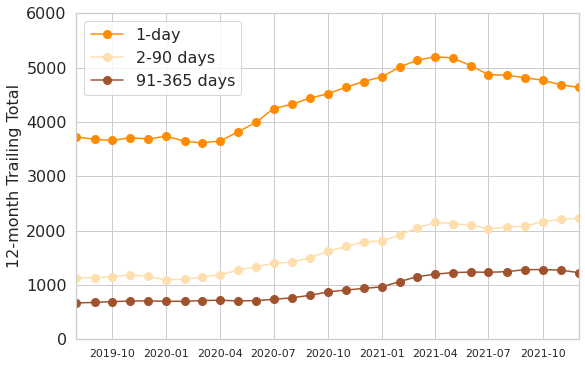

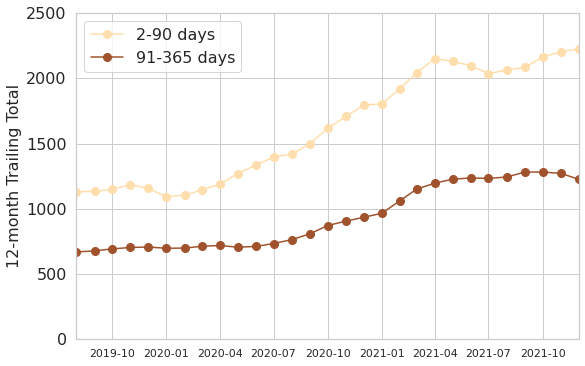

In [152]:
end_date = datetime.datetime(2021,12,1)
start_date = datetime.datetime(2019,8,1)

gpal = ['sienna','navajowhite','darkorange','peachpuff','peru','orange','darkgoldenrod']
print(gpal[0])
cdat = ['self_91_365_days','self_2_90_days','self_study_day_1_users_date_track','self_rest']

clab = ['91-365 days','2-90 days','1-day','unknown']

mlab = ['o','o','o','o','o']
msiz = [8,8,8,8,8]


plt.figure(figsize=(9,6))
plt.rc('ytick',labelsize=16)


plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_1_users_date_track, label=clab[2], color=gpal[2], marker=mlab[2],markersize=msiz[2]);
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_2_90_days,   label=clab[1], color=gpal[1], marker=mlab[1],markersize=msiz[1]);
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_91_365_days,      label=clab[0], color=gpal[0], marker=mlab[0],markersize=msiz[0]);


plt.legend(loc='lower left',fontsize=14);
plt.legend(loc='upper left',fontsize=16);
#plt.legend(loc=0,fontsize=14);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])
plt.ylim([0, 6000])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

    
plt.figure(figsize=(9,6))

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_2_90_days,   label=clab[1], color=gpal[1], marker=mlab[1],markersize=msiz[1]);
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_91_365_days,      label=clab[0], color=gpal[0], marker=mlab[0],markersize=msiz[0]);

#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_1_users_date_track, label=clab[2], color=gpal[2], marker=mlab[2],markersize=msiz[2]);


plt.legend(loc='lower left',fontsize=14);
plt.legend(loc='upper left',fontsize=16);
#plt.legend(loc=0,fontsize=14);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])
plt.ylim([0, 2500])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_unclass2_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass2_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_unclass2_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_unclass2_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass2_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_unclass2_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
 

lightgreen
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


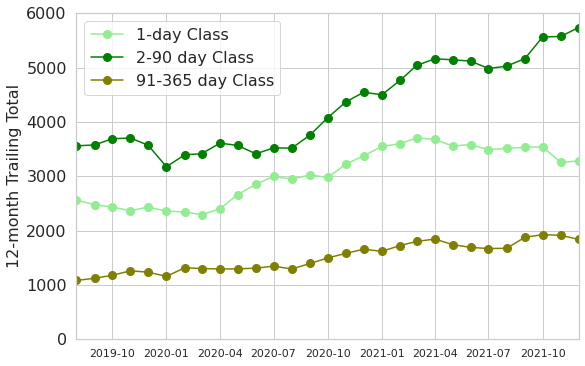

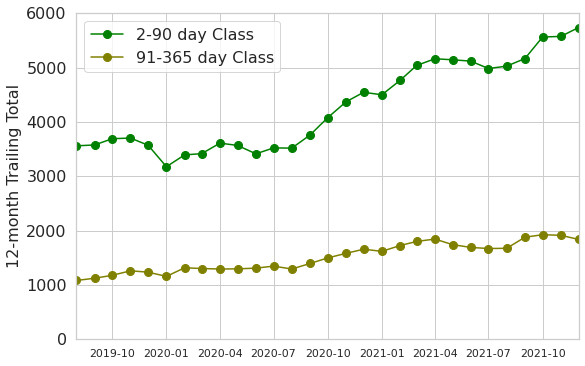

In [155]:
end_date = datetime.datetime(2021,12,1)
start_date = datetime.datetime(2019,8,1)

gpal = ['lightgreen','green','olive','darkmagenta','red']
print(gpal[0])
cdat = ['clustered_all_1_days','clustered_all_2_90_days','clustered_all_91_365_days']

clab = ['1-day Class','2-90 day Class','91-365 day Class']
mlab = ['o','o','o','o','o']
msiz = [8,8,8,8,8]


plt.figure(figsize=(9,6))
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_day_1_users_date_track,      label=clab[0], color=gpal[0], marker=mlab[0],markersize=msiz[0]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_2_90_days,   label=clab[1], color=gpal[1], marker=mlab[1],markersize=msiz[1]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_91_365_days, label=clab[2], color=gpal[2], marker=mlab[2],markersize=msiz[2]);


plt.legend(loc='lower left',fontsize=14);
plt.legend(loc='upper left',fontsize=16);
#plt.legend(loc=0,fontsize=14);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])
plt.ylim([0, 6000])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

    
plt.figure(figsize=(9,6))
#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_day_1_users_date_track,      label=clab[0], color=gpal[0], marker=mlab[0],markersize=msiz[0]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_2_90_days,   label=clab[1], color=gpal[1], marker=mlab[1],markersize=msiz[1]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_91_365_days, label=clab[2], color=gpal[2], marker=mlab[2],markersize=msiz[2]);


plt.legend(loc='lower left',fontsize=14);
plt.legend(loc='upper left',fontsize=16);
#plt.legend(loc=0,fontsize=14);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])
plt.ylim([0, 6000])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class2_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class2_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class2_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class2_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class2_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class2_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')


lightblue
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]
lightblue
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/4249273504.py:157: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt

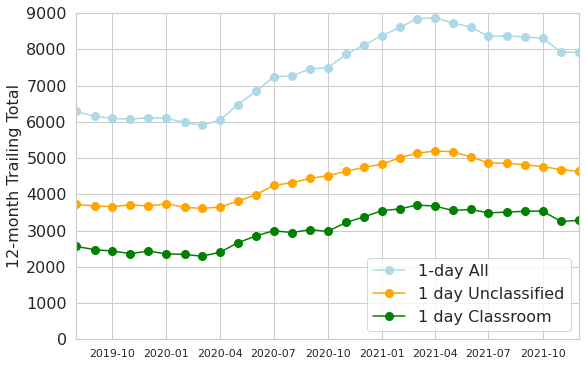

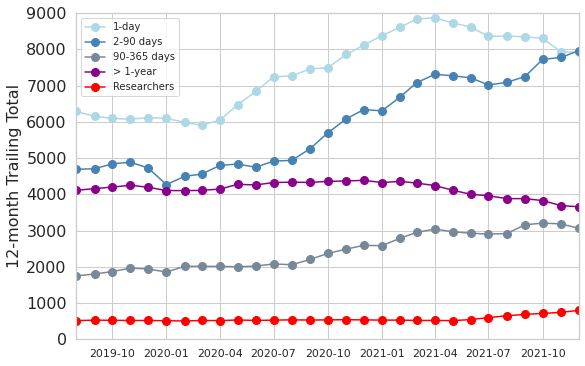

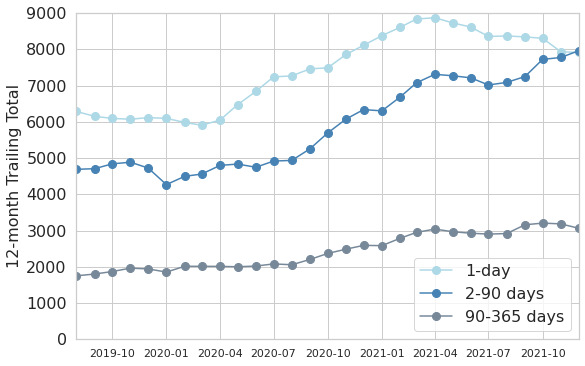

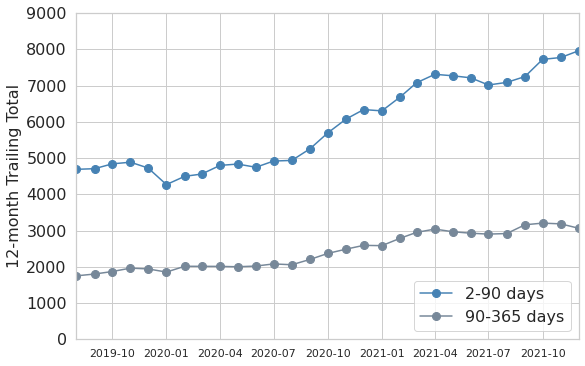

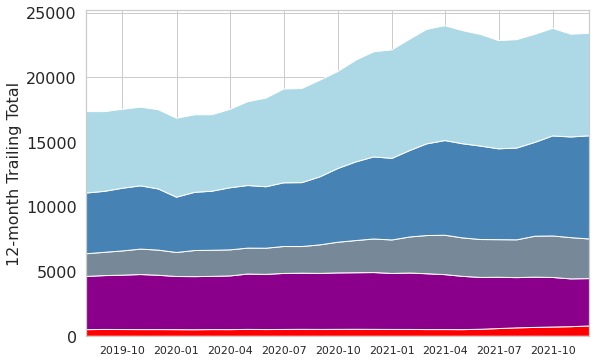

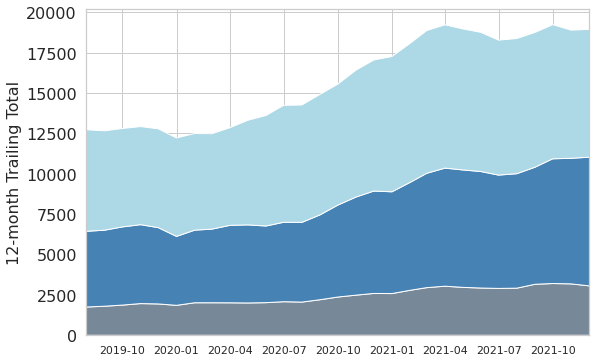

In [154]:
end_date = datetime.datetime(2021,12,1)
start_date = datetime.datetime(2019,8,1)

gpal = ['lightblue','orange','green','darkmagenta','red']
print(gpal[0])
cdat = ['all_1_days','all_2_90_days','all_91_365_days','all_years','all_researchers']

clab = ['1-day All','1 day Unclassified','1 day Classroom','> 1-year','Researchers']
mlab = ['o','o','o','o','o']
msiz = [8,8,8,8,8]


plt.figure(figsize=(9,6))
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_1_days,      label=clab[0], color=gpal[0], marker=mlab[0],markersize=msiz[0]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_1_users_date_track,   label=clab[1], color=gpal[1], marker=mlab[1],markersize=msiz[1]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_day_1_users_date_track, label=clab[2], color=gpal[2], marker=mlab[2],markersize=msiz[2]);


plt.legend(loc='lower left',fontsize=14);
plt.legend(loc='upper left',fontsize=16);
plt.legend(loc='lower right',fontsize=16);
#plt.legend(loc=0,fontsize=14);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])
plt.ylim([0, 9000])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_all_1day_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_1day_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_1day_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_all_1day_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_1day_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_1day_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
  

gpal = ['lightblue','steelblue','lightslategray','darkmagenta','red']
print(gpal[0])
cdat = ['all_1_days','all_2_90_days','all_91_365_days','all_years','all_researchers']

clab = ['1-day','2-90 days','90-365 days','> 1-year','Researchers']
mlab = ['o','o','o','o','o']
msiz = [8,8,8,8,8]


plt.figure(figsize=(9,6))
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_1_days,      label=clab[0], color=gpal[0], marker=mlab[0],markersize=msiz[0]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_2_90_days,   label=clab[1], color=gpal[1], marker=mlab[1],markersize=msiz[1]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_91_365_days, label=clab[2], color=gpal[2], marker=mlab[2],markersize=msiz[2]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_years,       label=clab[3], color=gpal[3], marker=mlab[3],markersize=msiz[3]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_researchers, label=clab[4], color=gpal[4], marker=mlab[4],markersize=msiz[4]);

plt.ylim([0, 9000])
plt.legend(loc='lower left',fontsize=14);
plt.legend(loc='upper left',fontsize=10);
#plt.legend(loc=0,fontsize=14);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2dCOVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2dCOVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2dCOVID.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

    
    
plt.figure(figsize=(9,6))
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_1_days,      label=clab[0], color=gpal[0], marker=mlab[0],markersize=msiz[0]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_2_90_days,   label=clab[1], color=gpal[1], marker=mlab[1],markersize=msiz[1]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_91_365_days, label=clab[2], color=gpal[2], marker=mlab[2],markersize=msiz[2]);


plt.ylim([0, 9000])
plt.legend(loc='lower left',fontsize=14);
plt.legend(loc='lower right',fontsize=16);
#plt.legend(loc=0,fontsize=14);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnores.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnores.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnores.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnores.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnores.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnores.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
  

    
plt.figure(figsize=(9,6))
#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_1_days,      label=clab[0], color=gpal[0], marker=mlab[0],markersize=msiz[0]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_2_90_days,   label=clab[1], color=gpal[1], marker=mlab[1],markersize=msiz[1]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_91_365_days, label=clab[2], color=gpal[2], marker=mlab[2],markersize=msiz[2]);


plt.ylim([0, 9000])
plt.legend(loc='lower left',fontsize=14);
plt.legend(loc='lower right',fontsize=16);
#plt.legend(loc=0,fontsize=14);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnoresnot1day.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnoresnot1day.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnoresnot1day.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnoresnot1day.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnoresnot1day.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2dCOVIDnoresnot1day.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
  


plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[[cdat[4],cdat[3],cdat[2],cdat[1],cdat[0]]].to_numpy().T, \
                          labels=[clab[4],clab[3],clab[2],clab[1],clab[0]], \
                          colors=[gpal[4],gpal[3],gpal[2],gpal[1],gpal[0]]); #Self-study

#plt.legend(loc='upper left',fontsize=16);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_lifetimerevsmall_COVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_lifetimerevsmall_COVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_lifetimerevsmall_COVID.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_lifetimerevsmall_COVID.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_lifetimerevsmall_COVID.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_lifetimerevsmall_COVID.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
 
plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[[cdat[2],cdat[1],cdat[0]]].to_numpy().T, \
                          labels=[clab[2],clab[1],clab[0]], \
                          colors=[gpal[2],gpal[1],gpal[0]]); #Self-study

#plt.legend(loc='upper left',fontsize=16);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_lifetimerevsmall_COVID2.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_lifetimerevsmall_COVID2.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_lifetimerevsmall_COVID2.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_lifetimerevsmall_COVID2.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_lifetimerevsmall_COVID2.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_lifetimerevsmall_COVID2.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
 



end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2008,1,1)

lightblue
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_15661/1313250069.py:65: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


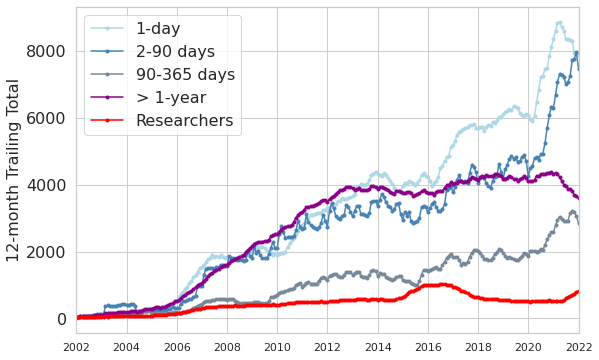

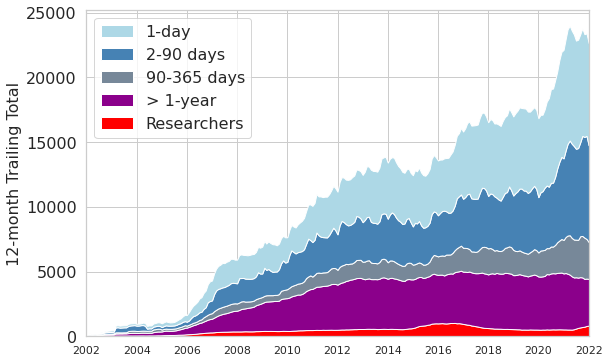

In [158]:

end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2002,1,1)

gpal = ['lightblue','steelblue','lightslategray','darkmagenta','red']
print(gpal[0])
cdat = ['all_1_days','all_2_90_days','all_91_365_days','all_years','all_researchers']

clab = ['1-day','2-90 days','90-365 days','> 1-year','Researchers']
mlab = ['o','o','o','o','o']
msiz = [3,3,3,3,3]


plt.figure(figsize=(9,6))
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_1_days,      label=clab[0], color=gpal[0], marker=mlab[0],markersize=msiz[0]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_2_90_days,   label=clab[1], color=gpal[1], marker=mlab[1],markersize=msiz[1]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_91_365_days, label=clab[2], color=gpal[2], marker=mlab[2],markersize=msiz[2]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_years,       label=clab[3], color=gpal[3], marker=mlab[3],markersize=msiz[3]);

plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_researchers, label=clab[4], color=gpal[4], marker=mlab[4],markersize=msiz[4]);




#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_rest_per, label='unknown', \
#             color='darkgoldenrod');
#'darksalmon','sienna','navajowhite','darkorange','peachpuff','peru','orange','darkgoldenrod'
#'darksalmon','sienna','navajowhite','orange','darkgoldenrod'
#plt.ylim([0, 25])
plt.legend(loc='upper left',fontsize=16);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2d.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2d.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_percent_lifetimesmall2d.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2d.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2d.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_percent_lifetimesmall2d.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
  


fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)

# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[[cdat[4],cdat[3],cdat[2],cdat[1],cdat[0]]].to_numpy().T, \
                          labels=[clab[4],clab[3],clab[2],clab[1],clab[0]], \
                          colors=[gpal[4],gpal[3],gpal[2],gpal[1],gpal[0]]); #Self-study

#plt.legend(loc='upper left',fontsize=16);
plt.rc('ytick',labelsize=16)
plt.ylabel('12-month Trailing Total',fontsize=16);
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],  loc='upper left',fontsize=16)


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_lifetimerevsmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_lifetimerevsmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_all_12months_lifetimerevsmall.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_lifetimerevsmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_lifetimerevsmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_all_12months_lifetimerevsmall.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
 



end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2008,1,1)

[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


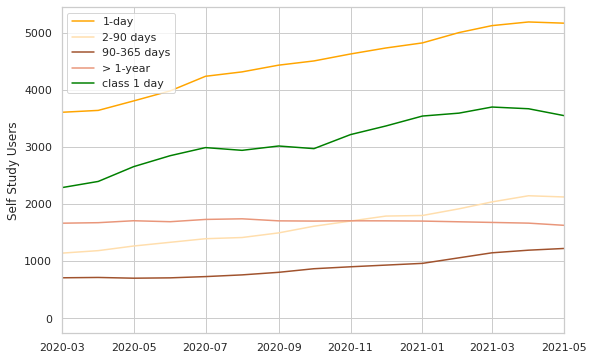

In [84]:
end_date = datetime.datetime(2021,5,1)
start_date = datetime.datetime(2020,3,1)

plt.figure(figsize=(9,6))
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_1_users_date_track, label='1-day', \
             color='orange');
#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_2_7_users_date_track, label='2-7 days', \
#             color='red');
#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_8_30_users_date_track, label='8-30 days', \
#             color='green');
#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_31_90_users_date_track, label='31-90 days', \
#             color='blue');
#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_91_180_users_date_track, label='91-180 days', \
#             color='black');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_2_90_days, label='2-90 days', \
             color='navajowhite');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_91_365_days, label='90-365 days', \
             color='sienna');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_years_users_date_track, label='> 1-year', \
             color='darksalmon');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_day_1_users_date_track, label='class 1 day', \
             color='green');



#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_rest_per, label='unknown', \
#             color='darkgoldenrod');
#'darksalmon','sienna','navajowhite','darkorange','peachpuff','peru','orange','darkgoldenrod'
#'darksalmon','sienna','navajowhite','orange','darkgoldenrod'
#plt.ylim([0, 25])
plt.legend(loc='upper left');
plt.ylabel('Self Study Users');
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_lifetimesmall2d.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_lifetimesmall2d.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_lifetimesmall2d.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_lifetimesmall2d.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_lifetimesmall2d.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_lifetimesmall2d.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')
    

end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2008,1,1)

[WARNING] [warnings - py.warnings]: /tmp/ipykernel_13522/2101468043.py:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_13522/2101468043.py:27: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_13522/2101468043.py:42: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]


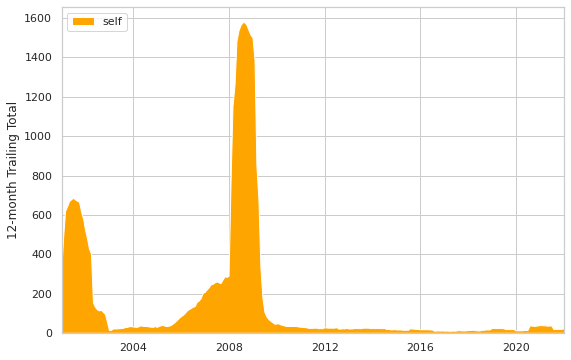

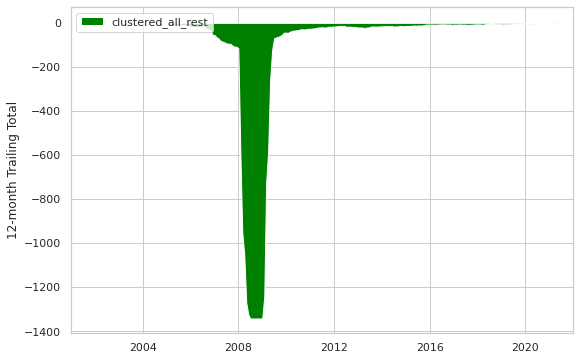

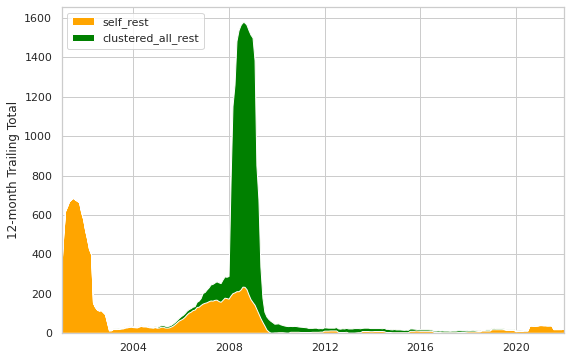

In [36]:
plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[['self_rest']].to_numpy().T, \
             labels=['self'], \
             colors=['orange']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()

plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[['clustered_all_rest']].to_numpy().T, \
             labels=['clustered_all_rest'], \
             colors=['green']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()

plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[['self_rest','clustered_all_rest']].to_numpy().T, \
             labels=['self_rest','clustered_all_rest'], \
             colors=['orange','green']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()

In [37]:
user_breakdown_df2['self_study_day_1_users_date_track_per'] =        100*np.divide(user_breakdown_df2['self_study_day_1_users_date_track'],total)
user_breakdown_df2['self_study_day_2_7_users_date_track_per'] =      100*np.divide(user_breakdown_df2['self_study_day_2_7_users_date_track'], total)
user_breakdown_df2['self_study_day_8_30_users_date_track_per'] =     100*np.divide(user_breakdown_df2['self_study_day_8_30_users_date_track'], total)
user_breakdown_df2['self_study_day_31_90_users_date_track_per'] =    100*np.divide(user_breakdown_df2['self_study_day_31_90_users_date_track'], total)
user_breakdown_df2['self_study_day_91_180_users_date_track_per'] =   100*np.divide(user_breakdown_df2['self_study_day_91_180_users_date_track'], total)
user_breakdown_df2['self_study_day_181_365_users_date_track_per'] =  100*np.divide(user_breakdown_df2['self_study_day_181_365_users_date_track'], total)
user_breakdown_df2['self_study_years_users_date_track'] =            100*np.divide(user_breakdown_df2['self_study_years_users_date_track'], total)
user_breakdown_df2['self_rest_per'] =                                100*np.divide(user_breakdown_df2['self_rest'], total)
user_breakdown_df2['self_91_365_days_per'] =                         100*np.divide(user_breakdown_df2['self_91_365_days'], total)
user_breakdown_df2['self_2_90_days_per'] =                           100*np.divide(user_breakdown_df2['self_2_90_days'], total)
user_breakdown_df2['self_over_1_days_per'] =                           100*np.divide(user_breakdown_df2['self_over_1_days'], total)

[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


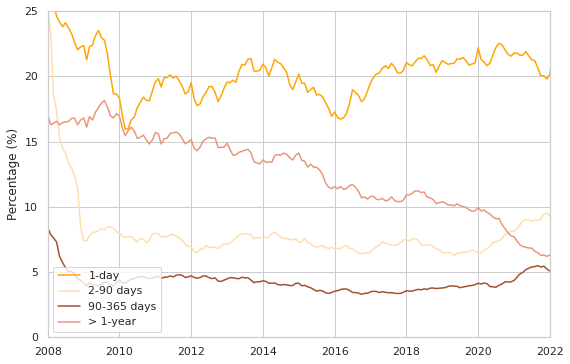

In [38]:

end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2008,1,1)

plt.figure(figsize=(9,6))
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_track_per, label='Classroom Total', \
#              color='green');
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_researchers_per, label='All Researchers', \
#              color='firebrick');
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.researcher_track_per, label='Citing Researchers', \
#              color='red');
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_identified_track_per, label='Self-Identified Researchers', \
#              color='magenta');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_1_users_date_track_per, label='1-day', \
             color='orange');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_2_90_days_per, label='2-90 days', \
             color='navajowhite');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_91_365_days_per, label='90-365 days', \
             color='sienna');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_years_users_date_track, label='> 1-year', \
             color='darksalmon');
#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_rest_per, label='unknown', \
#             color='darkgoldenrod');
#'darksalmon','sienna','navajowhite','darkorange','peachpuff','peru','orange','darkgoldenrod'
#'darksalmon','sienna','navajowhite','orange','darkgoldenrod'
plt.ylim([0, 25])
plt.legend(loc='lower left');
plt.ylabel('Percentage (%)');
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_lifetimesmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_lifetimesmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_lifetimesmall.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_lifetimesmall.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_lifetimesmall.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_lifetimesmall.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


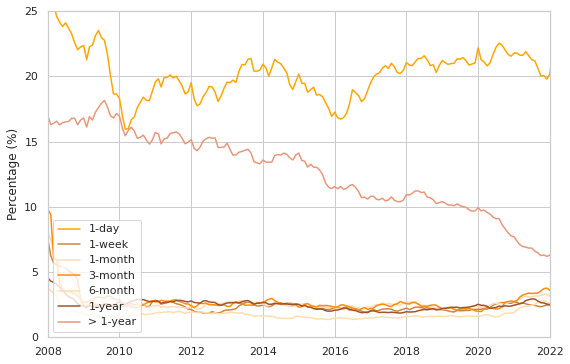

In [39]:
end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2008,1,1)

plt.figure(figsize=(9,6))
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_track_per, label='Classroom Total', \
#              color='green');
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_researchers_per, label='All Researchers', \
#              color='firebrick');
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.researcher_track_per, label='Citing Researchers', \
#              color='red');
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_identified_track_per, label='Self-Identified Researchers', \
#              color='magenta');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_1_users_date_track_per, label='1-day', \
             color='orange');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_2_7_users_date_track_per, label='1-week', \
             color='peru');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_8_30_users_date_track_per, label='1-month', \
             color='peachpuff');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_31_90_users_date_track_per, label='3-month', \
             color='darkorange');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_91_180_users_date_track_per, label='6-month', \
             color='navajowhite');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_day_181_365_users_date_track_per, label='1-year', \
             color='sienna');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_study_years_users_date_track, label='> 1-year', \
             color='darksalmon');
#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_rest_per, label='unknown', \
#             color='darkgoldenrod');
#'darksalmon','sienna','navajowhite','darkorange','peachpuff','peru','orange','darkgoldenrod'

plt.ylim([0, 25])
plt.legend(loc='lower left');
plt.ylabel('Percentage (%)');
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_lifetime.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_lifetime.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_lifetime.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_lifetime.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_lifetime.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_lifetime.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

darkgreen
[WARNING] [warnings - py.warnings]: /tmp/ipykernel_13522/1974586785.py:19: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


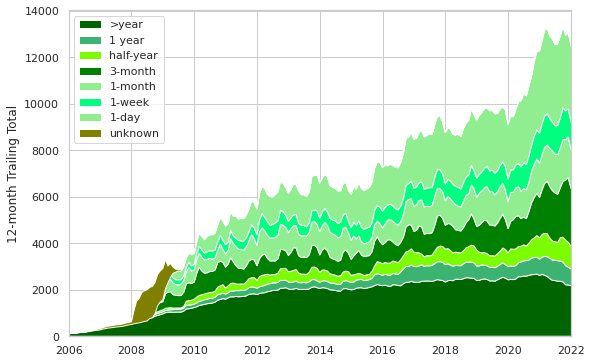

In [40]:
end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2006,1,1)

gpal = ['darkgreen','mediumseagreen','lawngreen','green','lightgreen','springgreen','lightgreen','olive']
print(gpal[0])
cdata = ['clustered_all_years_users_date_track','clustered_all_day_181_365_users_date_track','clustered_all_day_91_180_users_date_track','clustered_all_day_31_90_users_date_track','clustered_all_day_8_30_users_date_track','clustered_all_day_2_7_users_date_track','clustered_all_day_1_users_date_track','clustered_all_rest']
clab = ['>year','1 year','half-year','3-month','1-month','1-week','1-day','unknown']
plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
              user_breakdown_df2[[cdata[0],cdata[1],cdata[2],cdata[3],cdata[4],cdata[5],cdata[6],cdata[7]]].to_numpy().T, \
             labels=[clab[0],clab[1],clab[2],clab[3],clab[4],clab[5],clab[6],clab[7]], \
             colors=[gpal[0],gpal[1],gpal[2],gpal[3],gpal[4],gpal[5],gpal[6],gpal[7]]); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()


if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_clusters_12months_lifetime.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_clusters_12months_lifetime.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_clusters_12months_lifetime.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_clusters_12months_lifetime.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_clusters_12months_lifetime.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_clusters_12months_lifetime.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


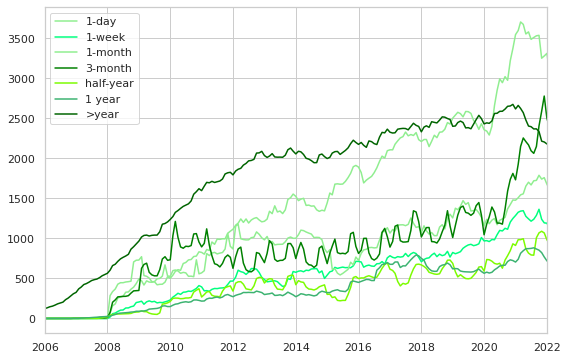

In [41]:
gpal = ['darkgreen','mediumseagreen','lawngreen','green','lightgreen','springgreen','lightgreen','olive']
clab = ['>year','1 year','half-year','3-month','1-month','1-week','1-day','unknown']

cdata = ['clustered_all_years_users_date_track','clustered_all_day_181_365_users_date_track','clustered_all_day_91_180_users_date_track','clustered_all_day_31_90_users_date_track','clustered_all_day_8_30_users_date_track','clustered_all_day_2_7_users_date_track','clustered_all_day_1_users_date_track','clustered_all_rest']
plt.figure(figsize=(9,6))
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_track_per, label='Classroom Total', \
#              color='green');
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_researchers_per, label='All Researchers', \
#              color='firebrick');
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.researcher_track_per, label='Citing Researchers', \
#              color='red');
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_identified_track_per, label='Self-Identified Researchers', \
#              color='magenta');
# plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_rest, label=clab[7], \
#              color=gpal[7]);
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_day_1_users_date_track, label=clab[6], \
             color=gpal[6]);
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_day_2_7_users_date_track, label=clab[5], \
             color=gpal[5]);
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_day_8_30_users_date_track, label=clab[4], \
             color=gpal[4]);
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_day_31_90_users_date_track, label=clab[3], \
             color=gpal[3]);
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_day_91_180_users_date_track, label=clab[2], \
             color=gpal[2]);
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_day_181_365_users_date_track, label=clab[1], \
             color=gpal[1]);
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_all_years_users_date_track, label=clab[0], \
             color=gpal[0]);
#plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_rest_per, label='unknown', \
#             color='darkgoldenrod');
#'darksalmon','sienna','navajowhite','darkorange','peachpuff','peru','orange','darkgoldenrod'

#plt.ylim([0, 25])
plt.legend(loc='upper left');
#plt.ylabel('Percentage (%)');
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_cluster_12months_percent_lifetime_line.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_cluster_12months_percent_lifetime_line.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_cluster_12months_percent_lifetime_line.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_cluster_12months_percent_lifetime_line.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_cluster_12months_percent_lifetime_line.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_cluster_12months_percent_lifetime_line.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')